# Step 1: Import data and treat missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from zipfile import ZipFile

**Read in data from Kaggle, view random samples of data and get shape of training and testing sets:**

**NOTE: I made the burdensome mistake here of keeping train and test sets separate and doing imputation and feature engineering for each dataset. I used the same methods on both sets, so it's equivalent to as if I had concatenated them first and applied all imputation and feature engineering methods on both sets. I just created some extra work for myself, thinking that keeping the sets separate was a good idea to observe any potential differences between the two. In hindsight, I would have concatenated the datasets first and worked off of just the concatenated set.**

In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

401 - Unauthorized


In [3]:
zipped = ZipFile('house-prices-advanced-regression-techniques.zip')
zipped.extractall()

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
pd.set_option('display.max_columns',100)
train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1024  1025          20       RL          NaN    15498   Pave   NaN      IR1   
701    702          20       RL         80.0     9600   Pave   NaN      Reg   
326    327         120       RL         32.0    10846   Pave   NaN      IR1   
999   1000          20       RL         64.0     6762   Pave   NaN      Reg   
564    565          60       RL          NaN    13346   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1024         Lvl    AllPub    Corner       Gtl       Timber       Norm   
701          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
326          Lvl    AllPub   CulDSac       Gtl      Veenker       Norm   
999          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
564          Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1024       Norm     1Fam     1Story            8            6       1976   
701        Norm     1Fam     1Story            7            5       1969   
326        Norm   TwnhsE     1Story            8            5       1993   
999        Norm     1Fam     1Story            7            5       2006   
564        Norm     1Fam     2Story            7            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1024          1976       Hip  WdShake       Stone     HdBoard       None   
701           1969       Hip  CompShg     HdBoard     HdBoard    BrkFace   
326           1993     Gable  CompShg     BrkFace     BrkFace       None   
999           2006     Gable  CompShg     VinylSd     VinylSd      Stone   
564           2000     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1024         0.0        Gd        TA     CBlock       Gd       TA   
701        168.0        TA        TA     CBlock       TA       TA   
326          0.0        Gd        TA      PConc       Gd       TA   
999         24.0        Gd        TA      PConc       Gd       TA   
564          0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1024           Av          ALQ        1165          LwQ         400   
701            No          Unf           0          Unf           0   
326            Gd          GLQ        1619          Unf           0   
999            Av          GLQ         686          Unf           0   
564            No          GLQ         728          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1024          0         1565    GasA        TA          Y      SBrkr   
701        1164         1164    GasA        TA          Y      SBrkr   
326         100         1719    GasA        Ex          Y      SBrkr   
999         501         1187    GasA        Ex          Y      SBrkr   
564         367         1095    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1024      2898         0             0       2898             1             0   
701       1164         0             0       1164             0             0   
326       1719         0             0       1719             2             0   
999       1208         0             0       1208             1             0   
564       1166      1129             0       2295             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1024         2         0             2             1          Gd   
701          1         1             3             1          TA   
326          1         1             1             1          Gd   
999          2         0             2             1          Gd   
564          2         1             4             1          Gd   

   

In [6]:
test.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1070  2531          20       RL          NaN    11354   Pave   NaN      Reg   
590   2051          20       RL         74.0     7785   Pave   NaN      IR1   
1388  2849          60       RL         70.0     8726   Pave   NaN      Reg   
736   2197          30       RL         67.0     5142   Pave   NaN      Reg   
603   2064          20       RL        102.0     9373   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1070         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
590          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1388         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
736          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
603          Lvl    AllPub    Corner       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1070       Norm     1Fam     1Story            7            5       2000   
590        Norm     1Fam     1Story            5            5       1956   
1388       Norm     1Fam     2Story            7            5       2002   
736        Norm     1Fam     1.5Fin            4            7       1923   
603        Norm     1Fam     1Story            5            6       1953   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1070          2000     Gable  CompShg     VinylSd     VinylSd       None   
590           1956     Gable  CompShg     HdBoard     HdBoard       None   
1388          2002     Gable  CompShg     VinylSd     VinylSd       None   
736           2008     Gable  CompShg     Wd Sdng     Wd Sdng       None   
603           1953     Gable  CompShg     MetalSd     MetalSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1070         0.0        Gd        TA      PConc       TA       TA   
590          0.0        TA        TA       Slab      NaN      NaN   
1388         0.0        Gd        TA      PConc       Gd       TA   
736          0.0        TA        TA      PConc       TA       TA   
603         84.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1070           Gd          GLQ      1412.0          Unf         0.0   
590           NaN          NaN         0.0          NaN         0.0   
1388           No          Unf         0.0          Unf         0.0   
736            No          ALQ       224.0          Unf         0.0   
603            No          Rec       500.0          LwQ       196.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1070      261.0       1673.0    GasA        Ex          Y      SBrkr   
590         0.0          0.0    GasA        TA          Y      SBrkr   
1388      872.0        872.0    GasA        Ex          Y      SBrkr   
736       725.0        949.0    GasA        TA          Y      SBrkr   
603       456.0       1152.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1070      1673         0             0       1673           1.0           0.0   
590       1014         0             0       1014           0.0           0.0   
1388       872      1037             0       1909           0.0           0.0   
736        949       343             0       1292           0.0           0.0   
603       1152         0             0       1152           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1070         2         0             3             1          Gd   
590          1         0             2             1          TA   
1388         2         1             4             1          Gd   
736          1         1             3             1          Gd   
603          1         1             3             1          TA   

   

In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

**The training set has 81 columns, one of which is the target variable (SalePrice). The testing set has 80 columns, one for each feature. Lots of features, so let's summarize:**

In [9]:
def create_summary(df):
    summary = pd.DataFrame()
    summary['dtype'] = df.dtypes
    summary['count'] = df.apply(lambda x: x.count())
    summary['missing'] = df.apply(lambda x: x.isnull().sum())
    summary['unique'] = df.apply(lambda x: [x.unique()])
    return summary

In [10]:
def summarize_missing(df):
    summary = pd.DataFrame()
    summary['dtype'] = df.dtypes
    summary['count'] = df.apply(lambda x: x.count())
    summary['missing'] = df.apply(lambda x: x.isnull().sum())
    summary['unique'] = df.apply(lambda x: [x.unique()])
    return summary[summary.missing > 0].sort_values(by='missing', ascending=False)

In [11]:
summary_train = create_summary(train)
summary_test = create_summary(test)

In [12]:
summary_train.head()

dtype  count  missing  \
Id             int64   1460        0   
MSSubClass     int64   1460        0   
MSZoning      object   1460        0   
LotFrontage  float64   1201      259   
LotArea        int64   1460        0   

                                                        unique  
Id           [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...  
MSSubClass   [[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80...  
MSZoning                           [[RL, RM, C (all), FV, RH]]  
LotFrontage  [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...  
LotArea      [[8450, 9600, 11250, 9550, 14260, 14115, 10084...

In [13]:
summary_test.head()

dtype  count  missing  \
Id             int64   1459        0   
MSSubClass     int64   1459        0   
MSZoning      object   1455        4   
LotFrontage  float64   1232      227   
LotArea        int64   1459        0   

                                                        unique  
Id           [[1461, 1462, 1463, 1464, 1465, 1466, 1467, 14...  
MSSubClass   [[20, 60, 120, 160, 80, 30, 50, 90, 85, 190, 4...  
MSZoning                      [[RH, RL, RM, FV, C (all), nan]]  
LotFrontage  [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63....  
LotArea      [[11622, 14267, 13830, 9978, 5005, 10000, 7980...

**Drop the ID field since it doesn't help us as a feature:**

In [14]:
train = train.drop(columns=['Id'])
test = test.drop(columns=['Id'])

**Look at features with missing values first, think about how to impute values if applicable:**

In [15]:
summarize_missing(train)

dtype  count  missing  \
PoolQC         object      7     1453   
MiscFeature    object     54     1406   
Alley          object     91     1369   
Fence          object    281     1179   
FireplaceQu    object    770      690   
LotFrontage   float64   1201      259   
GarageType     object   1379       81   
GarageYrBlt   float64   1379       81   
GarageFinish   object   1379       81   
GarageQual     object   1379       81   
GarageCond     object   1379       81   
BsmtExposure   object   1422       38   
BsmtFinType2   object   1422       38   
BsmtFinType1   object   1423       37   
BsmtCond       object   1423       37   
BsmtQual       object   1423       37   
MasVnrArea    float64   1452        8   
MasVnrType     object   1452        8   
Electrical     object   1459        1   

                                                         unique  
PoolQC                                      [[nan, Ex, Fa, Gd]]  
MiscFeature                     [[nan, Shed, Gar2, Othr, TenC]]  
Alley                                       [[nan, Grvl, Pave]]  
Fence                         [[nan, MnPrv, GdWo, GdPrv, MnWw]]  
FireplaceQu                         [[nan, TA, Gd, Fa, Ex, Po]]  
LotFrontage   [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...  
GarageType    [[Attchd, Detchd, BuiltIn, CarPort, nan, Basme...  
GarageYrBlt   [[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993...  
GarageFinish                             [[RFn, Unf, Fin, nan]]  
GarageQual                          [[TA, Fa, Gd, nan, Ex, Po]]  
GarageCond                          [[TA, Fa, nan, Gd, Po, Ex]]  
BsmtExposure                            [[No, Gd, Mn, Av, nan]]  
BsmtFinType2              [[Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]]  
BsmtFinType1              [[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]]  
BsmtCond                                [[TA, Gd, nan, Fa, Po]]  
BsmtQual                                [[Gd, TA, Ex, nan, Fa]]  
MasVnrArea    [[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286....  
MasVnrType                [[BrkFace, None, Stone, BrkCmn, nan]]  
Electrical             [[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]

In [16]:
summarize_missing(test)

dtype  count  missing  \
PoolQC         object      3     1456   
MiscFeature    object     51     1408   
Alley          object    107     1352   
Fence          object    290     1169   
FireplaceQu    object    729      730   
LotFrontage   float64   1232      227   
GarageCond     object   1381       78   
GarageYrBlt   float64   1381       78   
GarageQual     object   1381       78   
GarageFinish   object   1381       78   
GarageType     object   1383       76   
BsmtCond       object   1414       45   
BsmtExposure   object   1415       44   
BsmtQual       object   1415       44   
BsmtFinType1   object   1417       42   
BsmtFinType2   object   1417       42   
MasVnrType     object   1443       16   
MasVnrArea    float64   1444       15   
MSZoning       object   1455        4   
BsmtFullBath  float64   1457        2   
BsmtHalfBath  float64   1457        2   
Functional     object   1457        2   
Utilities      object   1457        2   
GarageCars    float64   1458        1   
GarageArea    float64   1458        1   
TotalBsmtSF   float64   1458        1   
KitchenQual    object   1458        1   
BsmtUnfSF     float64   1458        1   
BsmtFinSF2    float64   1458        1   
BsmtFinSF1    float64   1458        1   
Exterior2nd    object   1458        1   
Exterior1st    object   1458        1   
SaleType       object   1458        1   

                                                         unique  
PoolQC                                          [[nan, Ex, Gd]]  
MiscFeature                           [[nan, Gar2, Shed, Othr]]  
Alley                                       [[nan, Pave, Grvl]]  
Fence                         [[MnPrv, nan, GdPrv, GdWo, MnWw]]  
FireplaceQu                         [[nan, TA, Gd, Po, Fa, Ex]]  
LotFrontage   [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63....  
GarageCond                          [[TA, nan, Fa, Gd, Po, Ex]]  
GarageYrBlt   [[1961.0, 1958.0, 1997.0, 1998.0, 1992.0, 1993...  
GarageQual                              [[TA, nan, Fa, Gd, Po]]  
GarageFinish                             [[Unf, Fin, RFn, nan]]  
GarageType    [[Attchd, Detchd, BuiltIn, nan, Basment, 2Type...  
BsmtCond                                [[TA, Po, Fa, Gd, nan]]  
BsmtExposure                            [[No, Gd, Mn, Av, nan]]  
BsmtQual                                [[TA, Gd, Ex, Fa, nan]]  
BsmtFinType1              [[Rec, ALQ, GLQ, Unf, BLQ, LwQ, nan]]  
BsmtFinType2              [[LwQ, Unf, Rec, BLQ, GLQ, ALQ, nan]]  
MasVnrType                [[None, BrkFace, Stone, BrkCmn, nan]]  
MasVnrArea    [[0.0, 108.0, 20.0, 504.0, 492.0, 162.0, 256.0...  
MSZoning                       [[RH, RL, RM, FV, C (all), nan]]  
BsmtFullBath                        [[0.0, 1.0, 2.0, 3.0, nan]]  
BsmtHalfBath                             [[0.0, 1.0, nan, 2.0]]  
Functional       [[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]  
Utilities                                       [[AllPub, nan]]  
GarageCars                [[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, nan]]  
GarageArea    [[730.0, 312.0, 482.0, 470.0, 506.0, 440.0, 42...  
TotalBsmtSF   [[882.0, 1329.0, 928.0, 926.0, 1280.0, 763.0, ...  
KitchenQual                             [[TA, Gd, Ex, Fa, nan]]  
BsmtUnfSF     [[270.0, 406.0, 137.0, 324.0, 1017.0, 763.0, 2...  
BsmtFinSF2    [[144.0, 0.0, 78.0, 859.0, 981.0, 42.0, 46.0, ...  
BsmtFinSF1    [[468.0, 923.0, 791.0, 602.0, 263.0, 0.0, 935....  
Exterior2nd   [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
Exterior1st   [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
SaleType      [[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,...

# Imputing PoolQC, MiscFeature, Alley, Fence, FireplaceQu:

**PoolQC, MiscFeature, Alley, Fence, and FireplaceQu likely have so many missing values because there are houses where these features are not present. It would make sense that most houses in Ames, IA do not have pools. Looking at the data description file, it does look like the nan values for these features correspond to "None", so impute with "None" for now:**

In [17]:
def fillna_custom(df, features, fill_value):
    df_new = df.copy()
    for feature in features:
        df_new[feature] = df_new[feature].fillna(fill_value)
    return df_new

In [18]:
train_old = train
test_old = test
missing_features = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
train = fillna_custom(train_old, missing_features, "None")
test = fillna_custom(test_old, missing_features, "None")

# Imputing "Garage" features:

**All of the Garage features in the training set have 81 missing values. Check that all of these correspond to the same rows. If so, we can say that all of these correspond to houses with no garages, consistent with the data description document. We can impute GarageType, GarageFinish, GarageQual and GarageCond with "None":**

In [19]:
def mismatch_nas(df, features):
    df_na = df[features]
    df_na['numNA'] = df_na.apply(lambda x:x.isna().sum(), axis=1)
    return df_na[(df_na['numNA'] < len(features)) & (df_na['numNA'] > 0)]

In [20]:
pd.options.mode.chained_assignment = None
garage_missing_features = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
mismatch_nas(train, garage_missing_features)

Empty DataFrame
Columns: [GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, numNA]
Index: []

In [21]:
garage_missing_cat_features = ['GarageType','GarageFinish','GarageQual','GarageCond']
train = fillna_custom(train, garage_missing_cat_features, "None")

**What about GarageYrBlt? It would make sense to impute this with YearBuilt, since garages are typically built along with the house:**

In [22]:
train = fillna_custom(train, ['GarageYrBlt'], train['YearBuilt'])

In [23]:
train[garage_missing_features][train['GarageType']=="None"]

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39         None       1955.0         None       None       None
48         None       1920.0         None       None       None
78         None       1968.0         None       None       None
88         None       1915.0         None       None       None
89         None       1994.0         None       None       None
99         None       1959.0         None       None       None
108        None       1919.0         None       None       None
125        None       1935.0         None       None       None
127        None       1930.0         None       None       None
140        None       1971.0         None       None       None
148        None       2004.0         None       None       None
155        None       1924.0         None       None       None
163        None       1956.0         None       None       None
165        None       1940.0         None       None       None
198        None       1912.0         None       None       None
210        None       1925.0         None       None       None
241        None       1945.0         None       None       None
250        None       1940.0         None       None       None
287        None       1971.0         None       None       None
291        None       1912.0         None       None       None
307        None       1920.0         None       None       None
375        None       1922.0         None       None       None
386        None       1910.0         None       None       None
393        None       1941.0         None       None       None
431        None       1920.0         None       None       None
434        None       1972.0         None       None       None
441        None       1955.0         None       None       None
464        None       1978.0         None       None       None
495        None       1920.0         None       None       None
520        None       1900.0         None       None       None
...         ...          ...          ...        ...        ...
954        None       1975.0         None       None       None
960        None       1958.0         None       None       None
968        None       1910.0         None       None       None
970        None       1949.0         None       None       None
976        None       1923.0         None       None       None
1009       None       1926.0         None       None       None
1011       None       1965.0         None       None       None
1030       None       1916.0         None       None       None
1038       None       1970.0         None       None       None
1096       None       1914.0         None       None       None
1123       None       1947.0         None       None       None
1131       None       1991.0         None       None       None
1137       None       1875.0         None       None       None
1143       None       1959.0         None       None       None
1173       None       1946.0         None       None       None
1179       None       1954.0         None       None       None
1218       None       1947.0         None       None       None
1219       None       1971.0         None       None       None
1234       None       1911.0         None       None       None
1257       None       1922.0         None       None       None
1283       None       1971.0         None       None       None
1323       None       1940.0         None       None       None
1325       None       1922.0         None       None       None
1326       None       1931.0         None       None       None
1337       None       1941.0         None       None       None
1349       None       1872.0         None       None       None
1407       None       1985.0         None       None       None
1449       None       1970.0         None       None       None
1450       None       1974.0         None       None       None
1453       None       2006.0         None       None       None

[81 rows x 5 columns]

In [24]:
summarize_missing(train)

dtype  count  missing  \
LotFrontage   float64   1201      259   
BsmtExposure   object   1422       38   
BsmtFinType2   object   1422       38   
BsmtQual       object   1423       37   
BsmtCond       object   1423       37   
BsmtFinType1   object   1423       37   
MasVnrType     object   1452        8   
MasVnrArea    float64   1452        8   
Electrical     object   1459        1   

                                                         unique  
LotFrontage   [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...  
BsmtExposure                            [[No, Gd, Mn, Av, nan]]  
BsmtFinType2              [[Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]]  
BsmtQual                                [[Gd, TA, Ex, nan, Fa]]  
BsmtCond                                [[TA, Gd, nan, Fa, Po]]  
BsmtFinType1              [[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]]  
MasVnrType                [[BrkFace, None, Stone, BrkCmn, nan]]  
MasVnrArea    [[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286....  
Electrical             [[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]

**Garage features look good for the training set now. However, it looks like the testing set has some entries where this is not the case (some garage features are NaN, while others are not:**

In [25]:
mismatch_nas(test, garage_missing_features)

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond  numNA
666      Detchd          NaN          NaN        NaN        NaN      4
1116     Detchd          NaN          NaN        NaN        NaN      4

**Look at the GarageCars and GarageArea to see if these are actually garages:**

In [26]:
test.loc[[666,1116], ['GarageCars','GarageArea']]

GarageCars  GarageArea
666          1.0       360.0
1116         NaN         NaN

**Index 666 looks like a real garage, but 1116 is suspect. It is the only entry in the testing set with missing GarageCars and GarageArea. I will treat 1116 as a house falsely marked with a detached garage and impute all values as NaN or 0:**

In [27]:
def single_row_impute(df, index, features, value):
    df_new = df.copy()
    for feature in features:
        df_new.loc[index, feature] = value
    return df_new

In [28]:
test = single_row_impute(test, 1116, garage_missing_cat_features, "None")
test = single_row_impute(test, 1116, ['GarageCars','GarageArea'], 0)
test = single_row_impute(test, 1116, ['GarageYrBlt'], test.loc[1116, 'YearBuilt'])

In [29]:
test.loc[1116,['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']]

GarageType      None
GarageYrBlt     1923
GarageFinish    None
GarageQual      None
GarageCond      None
GarageCars         0
GarageArea         0
Name: 1116, dtype: object

**For index 666, let's impute GarageFinish, GarageQual, and GarageCond with the most frequently occurring value for detached garages. Impute GarageYrBlt with YearBuilt, same as before:**

In [30]:
test = single_row_impute(test, 666, ['GarageYrBlt'], test.loc[666, 'YearBuilt'])

In [31]:
test[test['GarageType']=="Detchd"]['GarageFinish'].value_counts()

Unf    365
RFn     15
Fin     10
Name: GarageFinish, dtype: int64

In [32]:
test[test['GarageType']=="Detchd"]['GarageQual'].value_counts()

TA    327
Fa     60
Po      2
Gd      1
Name: GarageQual, dtype: int64

In [33]:
test[test['GarageType']=="Detchd"]['GarageCond'].value_counts()

TA    347
Fa     36
Po      5
Gd      1
Ex      1
Name: GarageCond, dtype: int64

In [34]:
test = single_row_impute(test, 666, ['GarageFinish'], 'Unf')
test = single_row_impute(test, 666, ['GarageQual'], 'TA')
test = single_row_impute(test, 666, ['GarageCond'], 'TA')

In [35]:
test.loc[666,['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']]

GarageType      Detchd
GarageYrBlt       1910
GarageFinish       Unf
GarageQual          TA
GarageCond          TA
GarageCars           1
GarageArea         360
Name: 666, dtype: object

**Looks good, let's impute the rest of the garage features in the test set now:**

In [36]:
test = fillna_custom(test, garage_missing_cat_features, "None")
test = fillna_custom(test, ['GarageYrBlt'], test['YearBuilt'])

In [37]:
test[garage_missing_features][test['GarageType']=="None"]

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
53         None       1962.0         None       None       None
71         None       1920.0         None       None       None
79         None       1910.0         None       None       None
92         None       1912.0         None       None       None
96         None       1915.0         None       None       None
98         None       1907.0         None       None       None
100        None       1967.0         None       None       None
130        None       1958.0         None       None       None
133        None       1967.0         None       None       None
134        None       1931.0         None       None       None
154        None       1970.0         None       None       None
155        None       1970.0         None       None       None
257        None       2004.0         None       None       None
261        None       2004.0         None       None       None
327        None       1940.0         None       None       None
348        None       1910.0         None       None       None
350        None       1920.0         None       None       None
351        None       1910.0         None       None       None
359        None       1910.0         None       None       None
362        None       1900.0         None       None       None
371        None       1922.0         None       None       None
374        None       1902.0         None       None       None
376        None       1923.0         None       None       None
379        None       1987.0         None       None       None
387        None       1947.0         None       None       None
433        None       1959.0         None       None       None
550        None       2005.0         None       None       None
621        None       1961.0         None       None       None
630        None       1910.0         None       None       None
633        None       1920.0         None       None       None
...         ...          ...          ...        ...        ...
939        None       1945.0         None       None       None
962        None       1890.0         None       None       None
966        None       1895.0         None       None       None
1092       None       1955.0         None       None       None
1093       None       1946.0         None       None       None
1097       None       1923.0         None       None       None
1115       None       1925.0         None       None       None
1116       None       1923.0         None       None       None
1119       None       1895.0         None       None       None
1143       None       1970.0         None       None       None
1149       None       1971.0         None       None       None
1231       None       2005.0         None       None       None
1233       None       2005.0         None       None       None
1248       None       1964.0         None       None       None
1307       None       1960.0         None       None       None
1311       None       1962.0         None       None       None
1329       None       1920.0         None       None       None
1331       None       1918.0         None       None       None
1339       None       1919.0         None       None       None
1399       None       1975.0         None       None       None
1402       None       2002.0         None       None       None
1410       None       1922.0         None       None       None
1428       None       1925.0         None       None       None
1431       None       1945.0         None       None       None
1432       None       1951.0         None       None       None
1433       None       1916.0         None       None       None
1449       None       1970.0         None       None       None
1453       None       1970.0         None       None       None
1454       None       1970.0         None       None       None
1457       None       1992.0         None       None       None

[77 rows x 5 columns]

In [38]:
summarize_missing(test)

dtype  count  missing  \
LotFrontage   float64   1232      227   
BsmtCond       object   1414       45   
BsmtExposure   object   1415       44   
BsmtQual       object   1415       44   
BsmtFinType1   object   1417       42   
BsmtFinType2   object   1417       42   
MasVnrType     object   1443       16   
MasVnrArea    float64   1444       15   
MSZoning       object   1455        4   
Utilities      object   1457        2   
BsmtFullBath  float64   1457        2   
BsmtHalfBath  float64   1457        2   
Functional     object   1457        2   
Exterior2nd    object   1458        1   
Exterior1st    object   1458        1   
BsmtFinSF1    float64   1458        1   
BsmtFinSF2    float64   1458        1   
BsmtUnfSF     float64   1458        1   
TotalBsmtSF   float64   1458        1   
KitchenQual    object   1458        1   
SaleType       object   1458        1   

                                                         unique  
LotFrontage   [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63....  
BsmtCond                                [[TA, Po, Fa, Gd, nan]]  
BsmtExposure                            [[No, Gd, Mn, Av, nan]]  
BsmtQual                                [[TA, Gd, Ex, Fa, nan]]  
BsmtFinType1              [[Rec, ALQ, GLQ, Unf, BLQ, LwQ, nan]]  
BsmtFinType2              [[LwQ, Unf, Rec, BLQ, GLQ, ALQ, nan]]  
MasVnrType                [[None, BrkFace, Stone, BrkCmn, nan]]  
MasVnrArea    [[0.0, 108.0, 20.0, 504.0, 492.0, 162.0, 256.0...  
MSZoning                       [[RH, RL, RM, FV, C (all), nan]]  
Utilities                                       [[AllPub, nan]]  
BsmtFullBath                        [[0.0, 1.0, 2.0, 3.0, nan]]  
BsmtHalfBath                             [[0.0, 1.0, nan, 2.0]]  
Functional       [[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]  
Exterior2nd   [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
Exterior1st   [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
BsmtFinSF1    [[468.0, 923.0, 791.0, 602.0, 263.0, 0.0, 935....  
BsmtFinSF2    [[144.0, 0.0, 78.0, 859.0, 981.0, 42.0, 46.0, ...  
BsmtUnfSF     [[270.0, 406.0, 137.0, 324.0, 1017.0, 763.0, 2...  
TotalBsmtSF   [[882.0, 1329.0, 928.0, 926.0, 1280.0, 763.0, ...  
KitchenQual                             [[TA, Gd, Ex, Fa, nan]]  
SaleType      [[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,...

**The garage features are now all taken care of, moving on to the next set...**

# Imputing "Basement" features:

**Looking at the basement features in the training and testing sets, there appear to be a few mismatches where some values are NA but others are not:**

In [39]:
basement_features = ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2']
mismatch_nas(train, basement_features)

BsmtCond BsmtExposure BsmtQual BsmtFinType1 BsmtFinType2  numNA
332       TA           No       Gd          GLQ          NaN      1
948       TA          NaN       Gd          Unf          Unf      1

**Looking at square footages to get a better picture here:**

In [40]:
basement_features_all = basement_features+['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
train.loc[[332,948], basement_features_all]

BsmtCond BsmtExposure BsmtQual BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
332       TA           No       Gd          GLQ          NaN        1124   
948       TA          NaN       Gd          Unf          Unf           0   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
332         479       1603         3206  
948           0        936          936

**I'll impute BsmtFinType2 for index 332 with GLQ to match BsmtFinType1:**

In [41]:
train.loc[332,'BsmtFinType2'] = 'GLQ'

**For BsmtExposure for index 948, see what the most frequently occurring value is for unfinished basements:**

In [42]:
train[train.BsmtFinType1=="Unf"]['BsmtExposure'].value_counts()

No    345
Av     46
Mn     27
Gd     11
Name: BsmtExposure, dtype: int64

In [43]:
train.loc[948,'BsmtExposure'] = 'No'

In [44]:
mismatch_nas(train, basement_features)

Empty DataFrame
Columns: [BsmtCond, BsmtExposure, BsmtQual, BsmtFinType1, BsmtFinType2, numNA]
Index: []

**No more mismatches across NAs, so we can impute the values column by column. As done with the garage features, impute any NA to "None", since these are defined by houses having no basement:**

In [45]:
train = fillna_custom(train, basement_features, "None")

In [46]:
summarize_missing(train)

dtype  count  missing  \
LotFrontage  float64   1201      259   
MasVnrType    object   1452        8   
MasVnrArea   float64   1452        8   
Electrical    object   1459        1   

                                                        unique  
LotFrontage  [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...  
MasVnrType               [[BrkFace, None, Stone, BrkCmn, nan]]  
MasVnrArea   [[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286....  
Electrical            [[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]

**Training set looks good now, let's look at the testing set:**

In [47]:
mismatch_nas(test, basement_features)

BsmtCond BsmtExposure BsmtQual BsmtFinType1 BsmtFinType2  numNA
27         TA          NaN       Gd          Unf          Unf      1
580       NaN           Mn       Gd          GLQ          Rec      1
725       NaN           No       TA          BLQ          Unf      1
757        Fa           No      NaN          Unf          Unf      1
758        TA           No      NaN          Unf          Unf      1
888        TA          NaN       Gd          Unf          Unf      1
1064      NaN           Av       TA          ALQ          Unf      1

In [48]:
index_missing = list(mismatch_nas(test, basement_features).index)
test.loc[index_missing, basement_features_all]

BsmtCond BsmtExposure BsmtQual BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
27         TA          NaN       Gd          Unf          Unf         0.0   
580       NaN           Mn       Gd          GLQ          Rec      1044.0   
725       NaN           No       TA          BLQ          Unf      1033.0   
757        Fa           No      NaN          Unf          Unf         0.0   
758        TA           No      NaN          Unf          Unf         0.0   
888        TA          NaN       Gd          Unf          Unf         0.0   
1064      NaN           Av       TA          ALQ          Unf       755.0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
27           0.0     1595.0       1595.0  
580        382.0        0.0       1426.0  
725          0.0       94.0       1127.0  
757          0.0      173.0        173.0  
758          0.0      356.0        356.0  
888          0.0      725.0        725.0  
1064         0.0      240.0        995.0

**There are missing values for BsmtCond, BsmtExposure, and BsmtQual. Impute BsmtExposure in the same way we did for the training set:**

In [49]:
test.loc[[27,888],'BsmtExposure'] = 'No'

**Can we use BsmtCond to impute BsmtQual and vice versa?**

In [50]:
pd.crosstab(test.BsmtCond, test.BsmtQual)

BsmtQual   Ex  Fa   Gd   TA
BsmtCond                   
Fa          0  14    7   37
Gd         12   2   30   13
Po          1   1    0    1
TA        124  36  553  581

In [51]:
test.BsmtCond.value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [52]:
test.BsmtQual.value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

**For BsmtCond, the safest bet is to impute "TA", which makes up the vast majority of samples:**

In [53]:
test.loc[[580,725,1064],'BsmtCond'] = "TA"

**Looking at the crosstab matrix BsmtQual seems to correlate with BsmtCond, especially for BsmtCond = "Gd". But we don't have that type of missing value here (only "TA" and "Fa"), so it seems best to impute with "TA" here:**

In [54]:
test.loc[[757,758],'BsmtQual'] = "TA"

**Impute the remaining values as we did before:**

In [55]:
test = fillna_custom(test, basement_features, "None")

**Other basement features were missing 1 or 2 values as well in the testing set, let's just take care of them here:**

In [56]:
test[test.BsmtFinSF1.isna()][basement_features_all]

BsmtCond BsmtExposure BsmtQual BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
660     None         None     None         None         None         NaN   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
660         NaN        NaN          NaN

**The missing basement square footages should all be zero, since there is no basement for this house:**

In [57]:
test = single_row_impute(test, 660, ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'], 0)

**Looking at the missing basement bathrooms:**

In [58]:
test[test.BsmtFullBath.isna()][basement_features_all+['BsmtFullBath','BsmtHalfBath']]

BsmtCond BsmtExposure BsmtQual BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
660     None         None     None         None         None         0.0   
728     None         None     None         None         None         0.0   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
660         0.0        0.0          0.0           NaN           NaN  
728         0.0        0.0          0.0           NaN           NaN

**No basement in these cases either, so impute with zero:**

In [59]:
test = single_row_impute(test, [660,728], ['BsmtFullBath','BsmtHalfBath'], 0)

In [60]:
summarize_missing(test)

dtype  count  missing  \
LotFrontage  float64   1232      227   
MasVnrType    object   1443       16   
MasVnrArea   float64   1444       15   
MSZoning      object   1455        4   
Utilities     object   1457        2   
Functional    object   1457        2   
Exterior1st   object   1458        1   
Exterior2nd   object   1458        1   
KitchenQual   object   1458        1   
SaleType      object   1458        1   

                                                        unique  
LotFrontage  [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63....  
MasVnrType               [[None, BrkFace, Stone, BrkCmn, nan]]  
MasVnrArea   [[0.0, 108.0, 20.0, 504.0, 492.0, 162.0, 256.0...  
MSZoning                      [[RH, RL, RM, FV, C (all), nan]]  
Utilities                                      [[AllPub, nan]]  
Functional      [[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]  
Exterior1st  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
Exterior2nd  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
KitchenQual                            [[TA, Gd, Ex, Fa, nan]]  
SaleType     [[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,...

# Imputing "MasVnr" features:

In [61]:
masvnr_features = ['MasVnrType','MasVnrArea']
mismatch_nas(train, masvnr_features)

Empty DataFrame
Columns: [MasVnrType, MasVnrArea, numNA]
Index: []

**No mismatches in missing values, let's look at all of them:**

In [62]:
train[train.MasVnrType.isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234           60       RL          NaN     7851   Pave  None      Reg   
529           20       RL          NaN    32668   Pave  None      IR1   
650           60       FV         65.0     8125   Pave  None      Reg   
936           20       RL         67.0    10083   Pave  None      Reg   
973           20       FV         95.0    11639   Pave  None      Reg   
977          120       FV         35.0     4274   Pave  Pave      IR1   
1243          20       RL        107.0    13891   Pave  None      Reg   
1278          60       RL         75.0     9473   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
529           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
936           2003     Gable  CompShg     VinylSd     VinylSd        NaN   
973           2008     Gable  CompShg     CemntBd     CmentBd        NaN   
977           2007     Gable  CompShg     VinylSd     VinylSd        NaN   
1243          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC Ce

In [63]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

**Is there a relationship between the Exterior features and MasVnrType?**

In [64]:
pd.crosstab(train.Exterior1st, train.MasVnrType)

MasVnrType   BrkCmn  BrkFace  None  Stone
Exterior1st                              
AsbShng           0        1    18      1
AsphShn           0        0     1      0
BrkComm           0        0     2      0
BrkFace           0        0    49      1
CBlock            0        0     1      0
CemntBd           0       12    30     17
HdBoard           3      110   102      7
ImStucc           0        0     1      0
MetalSd           2       58   155      5
Plywood           1       43    61      3
Stone             0        0     2      0
Stucco            1        3    20      1
VinylSd           2      177   240     91
Wd Sdng           5       37   162      1
WdShing           1        4    20      1

In [65]:
pd.crosstab(train.Exterior2nd, train.MasVnrType)

MasVnrType   BrkCmn  BrkFace  None  Stone
Exterior2nd                              
AsbShng           0        1    18      1
AsphShn           0        2     1      0
Brk Cmn           0        0     7      0
BrkFace           0        0    25      0
CBlock            0        0     1      0
CmentBd           0       11    30     17
HdBoard           4      103    93      7
ImStucc           0        4     5      1
MetalSd           2       55   152      5
Other             0        1     0      0
Plywood           1       51    85      5
Stone             0        0     4      0
Stucco            1        3    21      1
VinylSd           2      176   236     85
Wd Sdng           4       34   158      1
Wd Shng           1        4    28      5

**Doesn't look like it. Let's just impute with "None" and 0 for the area, since those are the most common values.**

In [66]:
train = fillna_custom(train, ['MasVnrType'], "None")
train = fillna_custom(train, ['MasVnrArea'], 0)

In [67]:
summarize_missing(train)

dtype  count  missing  \
LotFrontage  float64   1201      259   
Electrical    object   1459        1   

                                                        unique  
LotFrontage  [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...  
Electrical            [[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]

**Now looking at the testing set:**

In [68]:
mismatch_nas(test, masvnr_features)

MasVnrType  MasVnrArea  numNA
1150        NaN       198.0      1

**Impute the missing MasVnrType here with BrkFace, which is the most common type that isn't "None". Since the area is non-zero, it doesn't make sense to impute "None":**

In [69]:
test = single_row_impute(test, 1150, ['MasVnrType'], "None")

In [70]:
mismatch_nas(test, masvnr_features)

Empty DataFrame
Columns: [MasVnrType, MasVnrArea, numNA]
Index: []

**Looking at all of the missing values now:**

In [71]:
test[test.MasVnrType.isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
231           60       RL          NaN    12891   Pave  None      IR1   
246           20       FV         90.0     7993   Pave  None      IR1   
422           60       RL         70.0     8749   Pave  None      Reg   
532           60       RL          NaN     7750   Pave  None      Reg   
544           20       RL         87.0    10037   Pave  None      Reg   
581           60       FV          NaN     7500   Pave  None      Reg   
851           60       RL         59.0    15810   Pave  None      IR1   
865           80       RL          NaN    11950   Pave  None      IR1   
880           20       RL         85.0     9965   Pave  None      Reg   
889           60       FV        112.0    12217   Pave  None      IR1   
908          120       FV         30.0     5330   Pave  Pave      IR2   
1132          20       RL         68.0     8298   Pave  None      IR1   
1197          60       RL        103.0    12867   Pave  None      IR1   
1226          20       RL         49.0    15218   Pave  None      IR1   
1402          20       RL         75.0     8050   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
231          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
246          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
422          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
532          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
544          Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
581          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
851          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
865          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
880          Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
889          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
908          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1132         HLS    AllPub    Inside       Gtl       Timber       Norm   
1197         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
1226         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
1402         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
231        Norm     1Fam     2Story            8            5       2002   
246        Norm     1Fam     1Story            7            5       2008   
422        Norm     1Fam     2Story            7            5       2002   
532        Norm     1Fam     2Story            7            5       2002   
544        Norm     1Fam     1Story            8            5       2006   
581        Norm     1Fam     2Story            7            5       2002   
851        Norm     1Fam     2Story            6            5       2007   
865        Norm     1Fam       SLvl            7            5       2003   
880        Norm     1Fam     1Story            7            5       2007   
889        Norm     1Fam     2Story            8            5       2007   
908        Norm   TwnhsE     1Story            8            5       2006   
1132       Norm     1Fam     1Story            8            5       2006   
1197       Norm     1Fam     2Story            8            5       2005   
1226       Norm     1Fam     1Story            8            5       2006   
1402       Norm     1Fam     1Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
231           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
246           2009     Gable  CompShg     VinylSd     VinylSd        NaN   
422           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
532           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
544           2007       Hip  CompShg     VinylSd     V

**Use the same method as the training set to impute:**

In [72]:
test = fillna_custom(test, ['MasVnrType'], "None")
test = fillna_custom(test, ['MasVnrArea'], 0)

In [73]:
summarize_missing(test)

dtype  count  missing  \
LotFrontage  float64   1232      227   
MSZoning      object   1455        4   
Utilities     object   1457        2   
Functional    object   1457        2   
Exterior1st   object   1458        1   
Exterior2nd   object   1458        1   
KitchenQual   object   1458        1   
SaleType      object   1458        1   

                                                        unique  
LotFrontage  [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63....  
MSZoning                      [[RH, RL, RM, FV, C (all), nan]]  
Utilities                                      [[AllPub, nan]]  
Functional      [[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]  
Exterior1st  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
Exterior2nd  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
KitchenQual                            [[TA, Gd, Ex, Fa, nan]]  
SaleType     [[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,...

# Imputing LotFrontage:

**Let's look at the LotConfig variable for these missing values to see if imputing with zero makes sense (i.e. the house doesn't have a street in front of it):**

In [79]:
all_data = pd.concat([train.iloc[:,0:train.shape[1]-1],test]).reset_index(drop=True)

In [80]:
all_data[all_data.LotFrontage.isna()]['LotConfig'].value_counts()

Inside     271
Corner     104
CulDSac     87
FR2         20
FR3          4
Name: LotConfig, dtype: int64

In [81]:
pd.set_option('display.max_rows', 100)
all_data.LotConfig.value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

**Unfortunately LotConfig doesn't seem to help much. Intuitively, can we use the square root of LotArea?**

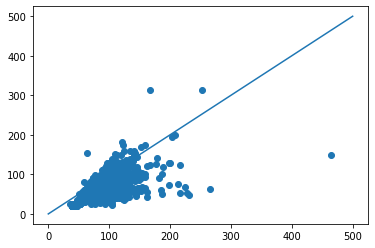

In [82]:
plt.scatter(np.sqrt(all_data.LotArea), all_data.LotFrontage)
plt.plot(np.linspace(0,500), np.linspace(0,500))

**There is a lot of fanning, which makes sense (lots can be wider with more frontage, or longer with less frontage). Not every lot will be perfectly square. Let's group by other features to see if imputing with the average is appropriate:**

In [83]:
all_data.groupby('LotConfig').mean()[['LotFrontage']]

LotFrontage
LotConfig             
Corner       82.690418
CulDSac      56.775281
FR2          61.276923
FR3          79.300000
Inside       67.205693

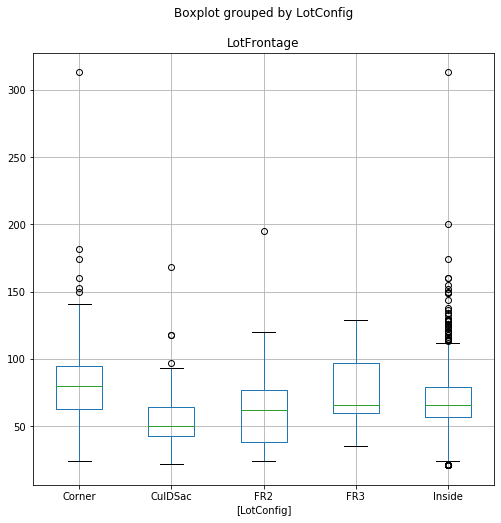

In [84]:
all_data[['LotConfig','LotFrontage']].boxplot(by='LotConfig', figsize=(8,8))

In [85]:
all_data.groupby('MSZoning').mean()[['LotFrontage']]

LotFrontage
MSZoning             
C (all)     65.608696
FV          59.529412
RH          55.434783
RL          74.052202
RM          52.246479

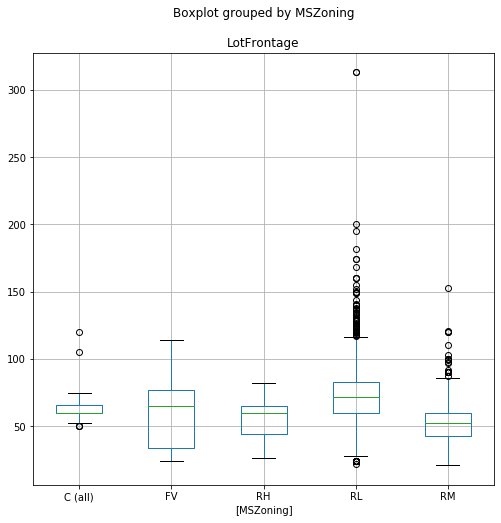

In [86]:
all_data[['MSZoning','LotFrontage']].boxplot(by='MSZoning', figsize=(8,8))

In [87]:
all_data.groupby('Neighborhood').mean()[['LotFrontage']]

LotFrontage
Neighborhood             
Blmngtn         46.900000
Blueste         27.300000
BrDale          21.500000
BrkSide         55.789474
ClearCr         88.150000
CollgCr         71.336364
Crawfor         69.951807
Edwards         66.910112
Gilbert         74.207207
IDOTRR          62.241379
MeadowV         25.606061
Mitchel         75.144444
NAmes           75.210667
NPkVill         28.142857
NWAmes          81.517647
NoRidge         91.629630
NridgHt         84.184049
OldTown         61.777293
SWISU           59.068182
Sawyer          74.551020
SawyerW         70.669811
Somerst         64.549383
StoneBr         62.173913
Timber          81.157895
Veenker         72.000000

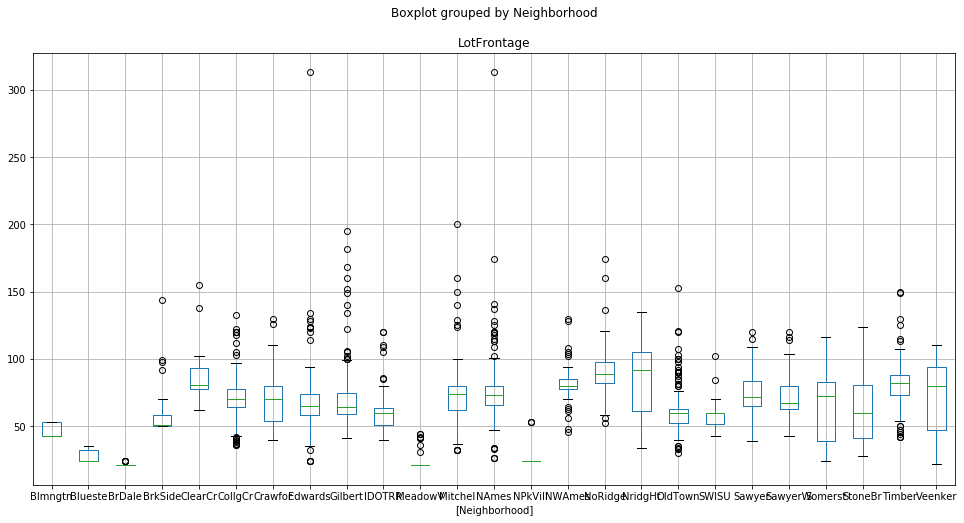

In [88]:
all_data[['Neighborhood','LotFrontage']].boxplot(by='Neighborhood', figsize=(16,8))

In [89]:
all_data[all_data.LotFrontage.isna()]['Neighborhood'].value_counts()

NAmes      68
Gilbert    54
Sawyer     53
CollgCr    47
NWAmes     46
Mitchel    24
ClearCr    24
Somerst    20
Crawfor    20
SawyerW    19
NoRidge    17
Edwards    16
Timber     15
BrkSide    13
OldTown    10
Blmngtn     8
Veenker     8
IDOTRR      6
StoneBr     5
MeadowV     4
SWISU       4
NridgHt     3
NPkVill     2
Name: Neighborhood, dtype: int64

In [90]:
all_data.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

**There looks to be the most variability in LotFrontage by Neighborhood, which makes sense - some neighborhoods will be more dense than others. I think this is an improvement over imputing by the mean or median grouped by LotConfig or MSZoning. Let's go ahead and impute LotFrontage by the median of the neighborhood's LotFrontage (not mean, since this is more sensitive to outliers):**

In [91]:
frontage_median = all_data.groupby(['Neighborhood']).median()[['LotFrontage']]
train['LotFrontage'] = train.apply(lambda x:frontage_median.loc[x.Neighborhood].values[0] if np.isnan(x.LotFrontage) else x.LotFrontage, axis=1)
test['LotFrontage'] = test.apply(lambda x:frontage_median.loc[x.Neighborhood].values[0] if np.isnan(x.LotFrontage) else x.LotFrontage, axis=1)

In [92]:
summarize_missing(train)

dtype  count  missing                                    unique
Electrical  object   1459        1  [[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]

In [93]:
summarize_missing(test)

dtype  count  missing  \
MSZoning     object   1455        4   
Utilities    object   1457        2   
Functional   object   1457        2   
Exterior1st  object   1458        1   
Exterior2nd  object   1458        1   
KitchenQual  object   1458        1   
SaleType     object   1458        1   

                                                        unique  
MSZoning                      [[RH, RL, RM, FV, C (all), nan]]  
Utilities                                      [[AllPub, nan]]  
Functional      [[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]  
Exterior1st  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
Exterior2nd  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
KitchenQual                            [[TA, Gd, Ex, Fa, nan]]  
SaleType     [[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,...

# Imputing features with few missing values:

**The Electrical feature in the training set is only missing one value:**

In [94]:
train[train.Electrical.isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379          80       RL         73.0     9735   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0        None    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0   None  None        None        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

**This looks to be missing completely at random. Impute with the most commonly occurring value:**

In [95]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [96]:
train = fillna_custom(train, ['Electrical'], "SBrkr")

In [97]:
summarize_missing(train)

Empty DataFrame
Columns: [dtype, count, missing, unique]
Index: []

**Training set is all good now, no missing values. The testing set is missing values from a few more features:**

In [98]:
summarize_missing(test)

dtype  count  missing  \
MSZoning     object   1455        4   
Utilities    object   1457        2   
Functional   object   1457        2   
Exterior1st  object   1458        1   
Exterior2nd  object   1458        1   
KitchenQual  object   1458        1   
SaleType     object   1458        1   

                                                        unique  
MSZoning                      [[RH, RL, RM, FV, C (all), nan]]  
Utilities                                      [[AllPub, nan]]  
Functional      [[Typ, Min2, Min1, Mod, Maj1, Sev, Maj2, nan]]  
Exterior1st  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
Exterior2nd  [[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd,...  
KitchenQual                            [[TA, Gd, Ex, Fa, nan]]  
SaleType     [[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI,...

In [99]:
test_missing_features = list(summarize_missing(test).index)

In [100]:
test[test_missing_features][test.isna().any(axis=1)]

MSZoning Utilities Functional Exterior1st Exterior2nd KitchenQual  \
95         RL    AllPub        Mod     Wd Sdng     Wd Sdng         NaN   
455       NaN       NaN       Min1     Wd Sdng     Wd Sdng          TA   
485        RL       NaN       Min2     BrkFace     BrkFace          TA   
691        RL    AllPub        Typ         NaN         NaN          Fa   
756       NaN    AllPub        NaN     AsbShng     VinylSd          Fa   
790       NaN    AllPub       Maj1     Wd Sdng     Wd Sdng          TA   
1013       RM    AllPub        NaN     Wd Sdng     Wd Sdng          TA   
1029       RL    AllPub        Typ     Plywood     Plywood          TA   
1444      NaN    AllPub        Mod      CBlock     VinylSd          TA   

     SaleType  
95        COD  
455     ConLD  
485        WD  
691        WD  
756        WD  
790        WD  
1013      COD  
1029      NaN  
1444       WD

**The missing values look like they are scattered and not consistent across all features. Let's look at each one by one:**

**Utilities is easy, since the only value in the entire dataset is AllPub. Impute with AllPub:**

In [101]:
test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [102]:
test = fillna_custom(test, ['Utilities'], "AllPub")

**There does appear to be a kitchen in the house with the missing KitchenQual, so we should impute with an existing value and not "None". Since "TA" is the most common value, let's just use that:**

In [103]:
test.KitchenQual.value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [104]:
test.loc[95, ['KitchenAbvGr','KitchenQual']]

KitchenAbvGr      1
KitchenQual     NaN
Name: 95, dtype: object

In [105]:
test = fillna_custom(test, ['KitchenQual'], "TA")

**Same treatment for SaleType and Functional:**

In [106]:
test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [107]:
test = fillna_custom(test, ['SaleType'], "WD")

In [108]:
test.Functional.value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [109]:
test = fillna_custom(test, ['Functional'], "Typ")

**For the Exterior features, first see if we can get anything from the MasVnrType. If not, just impute with the most frequently occurring value:**

In [110]:
test.loc[691,'MasVnrType']

'None'

In [111]:
test.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [112]:
test = fillna_custom(test, ['Exterior1st'], "VinylSd")
test = fillna_custom(test, ['Exterior2nd'], "VinylSd")

**For MSZoning the vast majority of entries are "RL", so we can go with that:**

In [113]:
test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [114]:
test = fillna_custom(test, ['MSZoning'], "RL")

In [115]:
summarize_missing(test)

Empty DataFrame
Columns: [dtype, count, missing, unique]
Index: []

**No more missing values in the training and testing sets, let's look at the summaries:**

In [116]:
create_summary(train)

dtype  count  missing  \
MSSubClass       int64   1460        0   
MSZoning        object   1460        0   
LotFrontage    float64   1460        0   
LotArea          int64   1460        0   
Street          object   1460        0   
Alley           object   1460        0   
LotShape        object   1460        0   
LandContour     object   1460        0   
Utilities       object   1460        0   
LotConfig       object   1460        0   
LandSlope       object   1460        0   
Neighborhood    object   1460        0   
Condition1      object   1460        0   
Condition2      object   1460        0   
BldgType        object   1460        0   
HouseStyle      object   1460        0   
OverallQual      int64   1460        0   
OverallCond      int64   1460        0   
YearBuilt        int64   1460        0   
YearRemodAdd     int64   1460        0   
RoofStyle       object   1460        0   
RoofMatl        object   1460        0   
Exterior1st     object   1460        0   
Exterior2nd     object   1460        0   
MasVnrType      object   1460        0   
MasVnrArea     float64   1460        0   
ExterQual       object   1460        0   
ExterCond       object   1460        0   
Foundation      object   1460        0   
BsmtQual        object   1460        0   
BsmtCond        object   1460        0   
BsmtExposure    object   1460        0   
BsmtFinType1    object   1460        0   
BsmtFinSF1       int64   1460        0   
BsmtFinType2    object   1460        0   
BsmtFinSF2       int64   1460        0   
BsmtUnfSF        int64   1460        0   
TotalBsmtSF      int64   1460        0   
Heating         object   1460        0   
HeatingQC       object   1460        0   
CentralAir      object   1460        0   
Electrical      object   1460        0   
1stFlrSF         int64   1460        0   
2ndFlrSF         int64   1460        0   
LowQualFinSF     int64   1460        0   
GrLivArea        int64   1460        0   
BsmtFullBath     int64   1460        0   
BsmtHalfBath     int64   1460        0   
FullBath         int64   1460        0   
HalfBath         int64   1460        0   
BedroomAbvGr     int64   1460        0   
KitchenAbvGr     int64   1460        0   
KitchenQual     object   1460        0   
TotRmsAbvGrd     int64   1460        0   
Functional      object   1460        0   
Fireplaces       int64   1460        0   
FireplaceQu     object   1460        0   
GarageType      object   1460        0   
GarageYrBlt    float64   1460        0   
GarageFinish    object   1460        0   
GarageCars       int64   1460        0   
GarageArea       int64   1460        0   
GarageQual      object   1460        0   
GarageCond      object   1460        0   
PavedDrive      object   1460        0   
WoodDeckSF       int64   1460        0   
OpenPorchSF      int64   1460        0   
EnclosedPorch    int64   1460        0   
3SsnPorch        int64   1460        0   
ScreenPorch      int64   1460        0   
PoolArea         int64   1460        0   
PoolQC          object   1460        0   
Fence           object   1460        0   
MiscFeature     object   1460        0   
MiscVal          int64   1460        0   
MoSold           int64   1460        0   
YrSold           int64   1460        0   
SaleType        object   1460        0   
SaleCondition   object   1460        0   
SalePrice        int64   1460        0   

                                                          unique  
MSSubClass     [[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80...  
MSZoning                             [[RL, RM, C (all), FV, RH]]  
LotFrontage    [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51...  
LotArea        [[8450, 9600, 11250, 9550, 14260, 14115, 10084...  
Street                                            [[Pave, Grvl]]  
Alley                                       [[None, Grvl, Pave]]  
LotShape                                  [[Reg, IR1, IR2, IR3]]  
LandContour                               [[Lvl, Bnk, Low, HLS]]  
Utilities  

In [117]:
create_summary(test)

dtype  count  missing  \
MSSubClass       int64   1459        0   
MSZoning        object   1459        0   
LotFrontage    float64   1459        0   
LotArea          int64   1459        0   
Street          object   1459        0   
Alley           object   1459        0   
LotShape        object   1459        0   
LandContour     object   1459        0   
Utilities       object   1459        0   
LotConfig       object   1459        0   
LandSlope       object   1459        0   
Neighborhood    object   1459        0   
Condition1      object   1459        0   
Condition2      object   1459        0   
BldgType        object   1459        0   
HouseStyle      object   1459        0   
OverallQual      int64   1459        0   
OverallCond      int64   1459        0   
YearBuilt        int64   1459        0   
YearRemodAdd     int64   1459        0   
RoofStyle       object   1459        0   
RoofMatl        object   1459        0   
Exterior1st     object   1459        0   
Exterior2nd     object   1459        0   
MasVnrType      object   1459        0   
MasVnrArea     float64   1459        0   
ExterQual       object   1459        0   
ExterCond       object   1459        0   
Foundation      object   1459        0   
BsmtQual        object   1459        0   
BsmtCond        object   1459        0   
BsmtExposure    object   1459        0   
BsmtFinType1    object   1459        0   
BsmtFinSF1     float64   1459        0   
BsmtFinType2    object   1459        0   
BsmtFinSF2     float64   1459        0   
BsmtUnfSF      float64   1459        0   
TotalBsmtSF    float64   1459        0   
Heating         object   1459        0   
HeatingQC       object   1459        0   
CentralAir      object   1459        0   
Electrical      object   1459        0   
1stFlrSF         int64   1459        0   
2ndFlrSF         int64   1459        0   
LowQualFinSF     int64   1459        0   
GrLivArea        int64   1459        0   
BsmtFullBath   float64   1459        0   
BsmtHalfBath   float64   1459        0   
FullBath         int64   1459        0   
HalfBath         int64   1459        0   
BedroomAbvGr     int64   1459        0   
KitchenAbvGr     int64   1459        0   
KitchenQual     object   1459        0   
TotRmsAbvGrd     int64   1459        0   
Functional      object   1459        0   
Fireplaces       int64   1459        0   
FireplaceQu     object   1459        0   
GarageType      object   1459        0   
GarageYrBlt    float64   1459        0   
GarageFinish    object   1459        0   
GarageCars     float64   1459        0   
GarageArea     float64   1459        0   
GarageQual      object   1459        0   
GarageCond      object   1459        0   
PavedDrive      object   1459        0   
WoodDeckSF       int64   1459        0   
OpenPorchSF      int64   1459        0   
EnclosedPorch    int64   1459        0   
3SsnPorch        int64   1459        0   
ScreenPorch      int64   1459        0   
PoolArea         int64   1459        0   
PoolQC          object   1459        0   
Fence           object   1459        0   
MiscFeature     object   1459        0   
MiscVal          int64   1459        0   
MoSold           int64   1459        0   
YrSold           int64   1459        0   
SaleType        object   1459        0   
SaleCondition   object   1459        0   

                                                          unique  
MSSubClass     [[20, 60, 120, 160, 80, 30, 50, 90, 85, 190, 4...  
MSZoning                             [[RH, RL, RM, FV, C (all)]]  
LotFrontage    [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, 64.0, 63...  
LotArea        [[11622, 14267, 13830, 9978, 5005, 10000, 7980...  
Street                                            [[Pave, Grvl]]  
Alley                                       [[None, Pave, Grvl]]  
LotShape                                  [[Reg, IR1, IR2, IR3]]  
LandContour                               [[Lvl, HLS, Bnk, Low]]  
Utilities                                            

# Step 2: Numerical and Graphical EDA

**SalePrice is the target variable, so it would make most sense to see how each numerical feature varies with SalePrice. This is also a good time to consider encoding ordinal categorical variables. I ordered categories taking into account how each value would affect desirability of buying property (e.g. a house on a steep slope would be less desirable than a house on level ground).**

In [118]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**I've listed all ordinal categorical variables below:**
- Street: Grvl = 0, Pave = 1
- Alley: None = 0, Grvl = 1, Pave = 2
- LotShape: Irregular = 0, ..., Regular = 3
- LandContour: Low = 0, ..., Lvl = 3
- Utilities: ELO = 0, ..., AllPub = 3
- LandSlope: Sev = 0, ..., Gtl = 2
- ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC: None = 0, Po = 1, ..., Ex = 5
- BsmtExposure: None = 0, No = 1, ..., Gd = 4
- BsmtFinType1/2: None = 0, Unf = 1, ..., GLQ = 6
- CentralAir: No = 0, Yes = 1
- Functional: Sal = 0, ..., Typ = 7
- GarageFinish: None = 0, ..., Fin = 3
- PavedDrive: N = 0, ..., Y = 2
- Fence: None = 0, ..., GdPrv = 4

**Create a dictionary with the encodings:**

In [119]:
# Create separate variable for quality variables since there are so many
qual_encodings = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
qual_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
dict_encode = {}
for feature in qual_features:
    dict_encode[feature] = qual_encodings
dict_encode['Street'] = {"Grvl":0, "Pave":1}
dict_encode['Alley'] = {"None":0, "Grvl":1, "Pave":2}
dict_encode['LotShape'] = {"IR3":0, "IR2":1, "IR1":2, "Reg":3}
dict_encode['LandContour'] = {"Low":0, "HLS":1, "Bnk":2, "Lvl":3}
dict_encode['Utilities'] = {"ELO":0, "NoSeWa":1, "NoSewr":2, "AllPub":3}
dict_encode['LandSlope'] = {"Sev":0, "Mod":1, "Gtl":2}
dict_encode['BsmtExposure'] = {"None":0, "No":1, "Mn":2, "Av":3, "Gd":4}
dict_encode['BsmtFinType1'] = {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
dict_encode['BsmtFinType2'] = {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
dict_encode['CentralAir'] = {"N":0, "Y":1}
dict_encode['Functional'] = {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7}
dict_encode['GarageFinish'] = {"None":0, "Unf":1, "RFn":2, "Fin":3}
dict_encode['PavedDrive'] = {"N":0, "P":1, "Y":2}
dict_encode['Fence'] = {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}

In [120]:
def ordinal_encode(df, features, dict_encode):
    for feature in features:
        df[feature] = df[feature].map(dict_encode[feature])
    return df

In [121]:
ord_features = list(dict_encode.keys())
train = ordinal_encode(train, ord_features, dict_encode)
test = ordinal_encode(test, ord_features, dict_encode)

**Check that the encoding worked properly:**

In [122]:
create_summary(train)

dtype  count  missing  \
MSSubClass       int64   1460        0   
MSZoning        object   1460        0   
LotFrontage    float64   1460        0   
LotArea          int64   1460        0   
Street           int64   1460        0   
Alley            int64   1460        0   
LotShape         int64   1460        0   
LandContour      int64   1460        0   
Utilities        int64   1460        0   
LotConfig       object   1460        0   
LandSlope        int64   1460        0   
Neighborhood    object   1460        0   
Condition1      object   1460        0   
Condition2      object   1460        0   
BldgType        object   1460        0   
HouseStyle      object   1460        0   
OverallQual      int64   1460        0   
OverallCond      int64   1460        0   
YearBuilt        int64   1460        0   
YearRemodAdd     int64   1460        0   
RoofStyle       object   1460        0   
RoofMatl        object   1460        0   
Exterior1st     object   1460        0   
Exterior2nd     object   1460        0   
MasVnrType      object   1460        0   
MasVnrArea     float64   1460        0   
ExterQual        int64   1460        0   
ExterCond        int64   1460        0   
Foundation      object   1460        0   
BsmtQual         int64   1460        0   
BsmtCond         int64   1460        0   
BsmtExposure     int64   1460        0   
BsmtFinType1     int64   1460        0   
BsmtFinSF1       int64   1460        0   
BsmtFinType2     int64   1460        0   
BsmtFinSF2       int64   1460        0   
BsmtUnfSF        int64   1460        0   
TotalBsmtSF      int64   1460        0   
Heating         object   1460        0   
HeatingQC        int64   1460        0   
CentralAir       int64   1460        0   
Electrical      object   1460        0   
1stFlrSF         int64   1460        0   
2ndFlrSF         int64   1460        0   
LowQualFinSF     int64   1460        0   
GrLivArea        int64   1460        0   
BsmtFullBath     int64   1460        0   
BsmtHalfBath     int64   1460        0   
FullBath         int64   1460        0   
HalfBath         int64   1460        0   
BedroomAbvGr     int64   1460        0   
KitchenAbvGr     int64   1460        0   
KitchenQual      int64   1460        0   
TotRmsAbvGrd     int64   1460        0   
Functional       int64   1460        0   
Fireplaces       int64   1460        0   
FireplaceQu      int64   1460        0   
GarageType      object   1460        0   
GarageYrBlt    float64   1460        0   
GarageFinish     int64   1460        0   
GarageCars       int64   1460        0   
GarageArea       int64   1460        0   
GarageQual       int64   1460        0   
GarageCond       int64   1460        0   
PavedDrive       int64   1460        0   
WoodDeckSF       int64   1460        0   
OpenPorchSF      int64   1460        0   
EnclosedPorch    int64   1460        0   
3SsnPorch        int64   1460        0   
ScreenPorch      int64   1460        0   
PoolArea         int64   1460        0   
PoolQC           int64   1460        0   
Fence            int64   1460        0   
MiscFeature     object   1460        0   
MiscVal          int64   1460        0   
MoSold           int64   1460        0   
YrSold           int64   1460        0   
SaleType        object   1460        0   
SaleCondition   object   1460        0   
SalePrice        int64   1460        0   

                                                          unique  
MSSubClass     [[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80...  
MSZoning                             [[RL, RM, C (all), FV, RH]]  
LotFrontage    [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51...  
LotArea        [[8450, 9600, 11250, 9550, 14260, 14115, 10084...  
Street                                                  [[1, 0]]  
Alley                                                [[0, 1, 2]]  
LotShape                                          [[3, 2, 1, 0]]  
LandContour                                       [[3, 2, 0, 1]]  
Utilities  

In [123]:
create_summary(test)

dtype  count  missing  \
MSSubClass       int64   1459        0   
MSZoning        object   1459        0   
LotFrontage    float64   1459        0   
LotArea          int64   1459        0   
Street           int64   1459        0   
Alley            int64   1459        0   
LotShape         int64   1459        0   
LandContour      int64   1459        0   
Utilities        int64   1459        0   
LotConfig       object   1459        0   
LandSlope        int64   1459        0   
Neighborhood    object   1459        0   
Condition1      object   1459        0   
Condition2      object   1459        0   
BldgType        object   1459        0   
HouseStyle      object   1459        0   
OverallQual      int64   1459        0   
OverallCond      int64   1459        0   
YearBuilt        int64   1459        0   
YearRemodAdd     int64   1459        0   
RoofStyle       object   1459        0   
RoofMatl        object   1459        0   
Exterior1st     object   1459        0   
Exterior2nd     object   1459        0   
MasVnrType      object   1459        0   
MasVnrArea     float64   1459        0   
ExterQual        int64   1459        0   
ExterCond        int64   1459        0   
Foundation      object   1459        0   
BsmtQual         int64   1459        0   
BsmtCond         int64   1459        0   
BsmtExposure     int64   1459        0   
BsmtFinType1     int64   1459        0   
BsmtFinSF1     float64   1459        0   
BsmtFinType2     int64   1459        0   
BsmtFinSF2     float64   1459        0   
BsmtUnfSF      float64   1459        0   
TotalBsmtSF    float64   1459        0   
Heating         object   1459        0   
HeatingQC        int64   1459        0   
CentralAir       int64   1459        0   
Electrical      object   1459        0   
1stFlrSF         int64   1459        0   
2ndFlrSF         int64   1459        0   
LowQualFinSF     int64   1459        0   
GrLivArea        int64   1459        0   
BsmtFullBath   float64   1459        0   
BsmtHalfBath   float64   1459        0   
FullBath         int64   1459        0   
HalfBath         int64   1459        0   
BedroomAbvGr     int64   1459        0   
KitchenAbvGr     int64   1459        0   
KitchenQual      int64   1459        0   
TotRmsAbvGrd     int64   1459        0   
Functional       int64   1459        0   
Fireplaces       int64   1459        0   
FireplaceQu      int64   1459        0   
GarageType      object   1459        0   
GarageYrBlt    float64   1459        0   
GarageFinish     int64   1459        0   
GarageCars     float64   1459        0   
GarageArea     float64   1459        0   
GarageQual       int64   1459        0   
GarageCond       int64   1459        0   
PavedDrive       int64   1459        0   
WoodDeckSF       int64   1459        0   
OpenPorchSF      int64   1459        0   
EnclosedPorch    int64   1459        0   
3SsnPorch        int64   1459        0   
ScreenPorch      int64   1459        0   
PoolArea         int64   1459        0   
PoolQC           int64   1459        0   
Fence            int64   1459        0   
MiscFeature     object   1459        0   
MiscVal          int64   1459        0   
MoSold           int64   1459        0   
YrSold           int64   1459        0   
SaleType        object   1459        0   
SaleCondition   object   1459        0   

                                                          unique  
MSSubClass     [[20, 60, 120, 160, 80, 30, 50, 90, 85, 190, 4...  
MSZoning                             [[RH, RL, RM, FV, C (all)]]  
LotFrontage    [[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, 64.0, 63...  
LotArea        [[11622, 14267, 13830, 9978, 5005, 10000, 7980...  
Street                                                  [[1, 0]]  
Alley                                                [[0, 2, 1]]  
LotShape                                          [[3, 2, 1, 0]]  
LandContour                                       [[3, 1, 2, 0]]  
Utilities                                            

**Looks good. Now let's look at correlations to SalePrice and some numerical and graphical EDA. The describe method is a good sanity check for all of the features:**

In [124]:
train.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.176370     22.433457     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
Street         1460.0       0.995890      0.063996      0.0       1.00   
Alley          1460.0       0.090411      0.372151      0.0       0.00   
LotShape       1460.0       2.591781      0.582296      0.0       2.00   
LandContour    1460.0       2.814384      0.606509      0.0       3.00   
Utilities      1460.0       2.998630      0.052342      1.0       3.00   
LandSlope      1460.0       1.937671      0.276232      0.0       2.00   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
ExterQual      1460.0       3.395890      0.574280      2.0       3.00   
ExterCond      1460.0       3.083562      0.351054      1.0       3.00   
BsmtQual       1460.0       3.489041      0.876478      0.0       3.00   
BsmtCond       1460.0       2.934932      0.552159      0.0       3.00   
BsmtExposure   1460.0       1.630822      1.066665      0.0       1.00   
BsmtFinType1   1460.0       3.545890      2.107776      0.0       1.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinType2   1460.0       1.251370      0.900364      0.0       1.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
HeatingQC      1460.0       4.145205      0.959501      1.0       3.00   
CentralAir     1460.0       0.934932      0.246731      0.0       1.00   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
KitchenQual    1460.0       3.511644      0.663760      2.0       3.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Functional     1460.0       6.841781      0.667698      1.0       7.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
FireplaceQu    1460.0       1.825342      1.810877      0.0       0.00   
GarageYrBlt    1460.0    1976.507534     26.306739   1872.0    1959.00   
GarageFinish   1460.0       1.715753      0.892831      0.0       1.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
GarageQual     1460.0       2.810274      0.722898      0.0       3.00   
GarageCond     1460.0       2.808904      0.719685      0.0       3.00   
PavedDrive     1460.0       1.856164      0.496592      0.0       2.00   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.

In [125]:
test.describe().transpose()

count         mean          std     min     25%     50%  \
MSSubClass     1459.0    57.378341    42.746880    20.0    20.0    50.0   
LotFrontage    1459.0    68.909184    20.935613    21.0    60.0    70.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.0  9399.0   
Street         1459.0     0.995888     0.064018     0.0     1.0     1.0   
Alley          1459.0     0.098698     0.373861     0.0     0.0     0.0   
LotShape       1459.0     2.607951     0.557864     0.0     2.0     3.0   
LandContour    1459.0     2.817683     0.586487     0.0     3.0     3.0   
Utilities      1459.0     3.000000     0.000000     3.0     3.0     3.0   
LandSlope      1459.0     1.954764     0.217566     0.0     2.0     2.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.0     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.0     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.0  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.0  1992.0   
MasVnrArea     1459.0    99.673749   177.001792     0.0     0.0     0.0   
ExterQual      1459.0     3.397533     0.586444     2.0     3.0     3.0   
ExterCond      1459.0     3.087731     0.392637     1.0     3.0     3.0   
BsmtQual       1459.0     3.470185     0.924982     0.0     3.0     3.0   
BsmtCond       1459.0     2.908156     0.581902     0.0     3.0     3.0   
BsmtExposure   1459.0     1.618917     1.071554     0.0     1.0     1.0   
BsmtFinType1   1459.0     3.537354     2.120627     0.0     1.0     4.0   
BsmtFinSF1     1459.0   438.902673   455.257119     0.0     0.0   350.0   
BsmtFinType2   1459.0     1.300206     1.013797     0.0     1.0     1.0   
BsmtFinSF2     1459.0    52.583276   176.698671     0.0     0.0     0.0   
BsmtUnfSF      1459.0   553.915010   437.351324     0.0   219.0   460.0   
TotalBsmtSF    1459.0  1045.400960   443.592976     0.0   784.0   988.0   
HeatingQC      1459.0     4.158328     0.956684     1.0     3.0     5.0   
CentralAir     1459.0     0.930775     0.253924     0.0     1.0     1.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.5  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.0     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.0     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.5  1432.0   
BsmtFullBath   1459.0     0.433859     0.530527     0.0     0.0     0.0   
BsmtHalfBath   1459.0     0.065113     0.252307     0.0     0.0     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.0     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.0     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.0     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.0     1.0   
KitchenQual    1459.0     3.509938     0.660780     2.0     3.0     3.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.0     6.0   
Functional     1459.0     6.854695     0.610379     1.0     7.0     7.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.0     0.0   
FireplaceQu    1459.0     1.710761     1.801147     0.0     0.0     0.0   
GarageYrBlt    1459.0  1976.000000    27.761773  1890.0  1958.0  1978.0   
GarageFinish   1459.0     1.716929     0.901185     0.0     1.0     2.0   
GarageCars     1459.0     1.764907     0.777056     0.0     1.0     2.0   
GarageArea     1459.0   472.444825   217.326902     0.0   317.5   480.0   
GarageQual     1459.0     2.793694     0.705117     0.0     3.0     3.0   
GarageCond     1459.0     2.810829     0.701649     0.0     3.0     3.0   
PavedDrive     1459.0     1.805346     0.574204     0.0     2.0     2.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.0     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.0    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.0     0.0   
3SsnPorch      1459.0     1.794380    20.

**Numerical correlations with SalePrice in descending order of correlation strength:**

In [126]:
train_corr = train.iloc[:,0:train.shape[1]-1].corrwith(train.SalePrice).sort_values(ascending=False)
train_corr

OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.375045
LotFrontage      0.347806
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
CentralAir       0.251328
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.111696
ScreenPorch      0.111447
Functional  

In [127]:
len(train_corr)

60

In [128]:
def plots_vs_target(df, target, cols, ncol_plot=3):
    nrow_plot = int(np.ceil(len(cols)/ncol_plot))
    fig, ax = plt.subplots(nrow_plot, ncol_plot, figsize=(16,16/ncol_plot*nrow_plot))
    r = 0
    c = 0
    for col in cols:
        ax[r,c].scatter(df[col], df[target])
        ax[r,c].set_title(col)
        c += 1
        if c == ncol_plot:
            c = 0
            r += 1

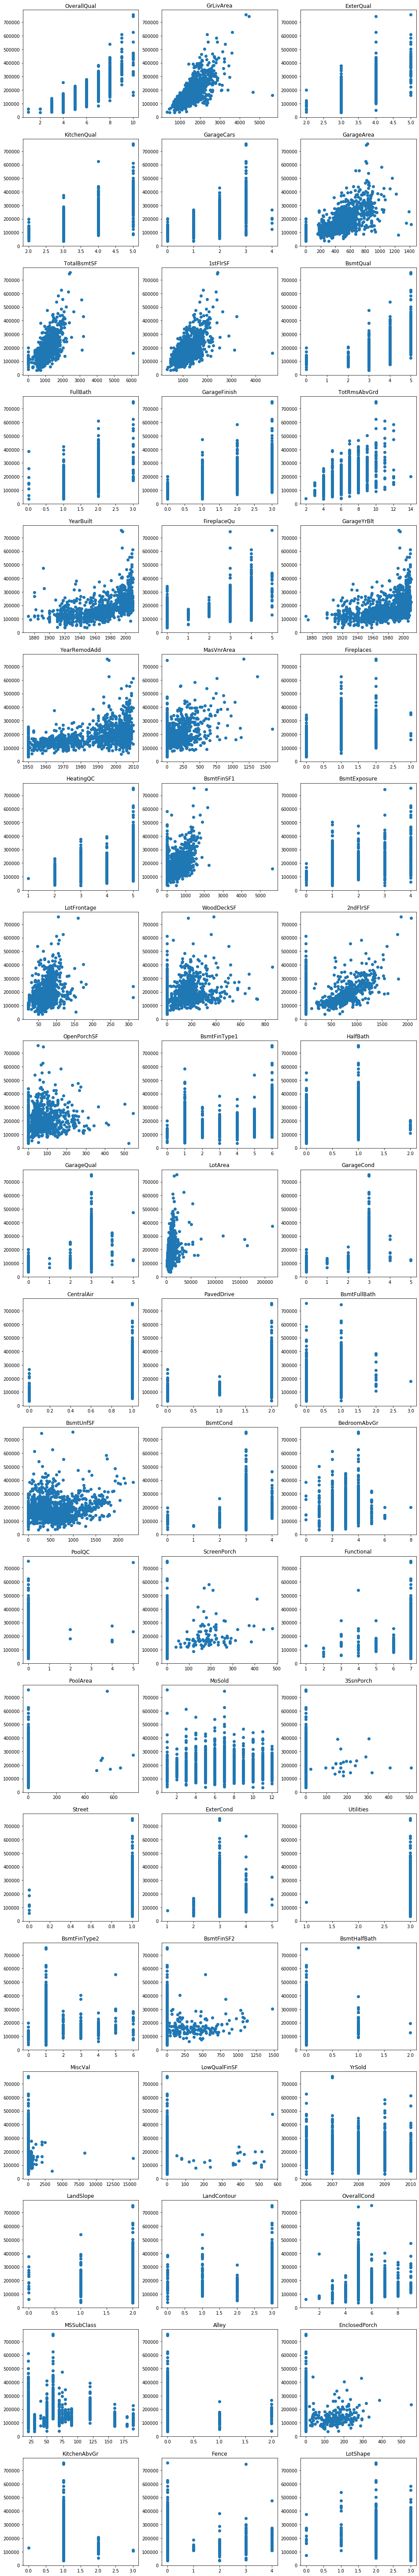

In [129]:
plots_vs_target(train, 'SalePrice', list(train_corr.index))

**A quick observation here is that MSSubClass is of type int64, but the number acts as a label rather than an actual value. Convert it from int to str:**

In [130]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

**Some observations from the scatterplots:**
- **A number of the "Qual" features correlate well with SalePrice (Overall, Exter, Kitchen, Bsmt), and will likely be good predictors in the model.**
- **As expected, total living area is correlated highly with SalePrice, as are other measures of square footage (TotalBsmt, 1stFlr). 2ndFlr does not correlate as well, because a large fraction of houses do not have a second floor. Consider using a total square footage.**
- **FullBath correlates well with SalePrice, but none of the other bathroom features do. Consider combining all of them into one?**
- **There are so few pools in the dataset, and houses with pools do not seem to have higher SalePrice than houses without pools. Consider removing the features, or combine with another feature. Same for 3SsnPorch.**
- **Utilities is a good candidate for removal since all but one sample has the same value.**
- **Several of the features appear to correlate well with each other (e.g. YearBuilt and GarageYrBlt), so we should consider combining them or removing one to prevent multicollinearity.**
- **There are many Bsmt features related to finished/unfinished areas that could be combined.**

**Consider the MoSold feature - is a scale from 1 to 12 the wrong way to think about it? Dig a bit into seasonality:**

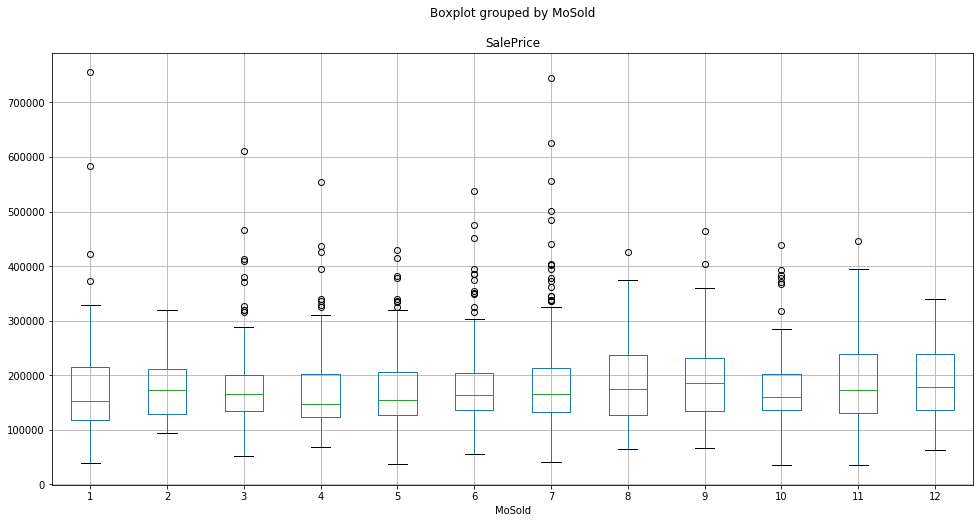

In [131]:
train.boxplot(column='SalePrice', by='MoSold', figsize=(16,8))

**It is common belief that housing prices rise in the summer and fall in the winter. What if we map the month to a sine function (trough in the winter, peak in the summer)? This is a common practice done in environmental engineering:**

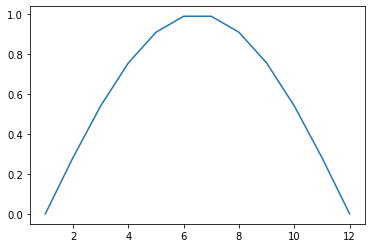

In [132]:
month = np.linspace(1,12,12)
sin_month = np.sin((month-1)*np.pi/11)
plt.plot(month,sin_month)

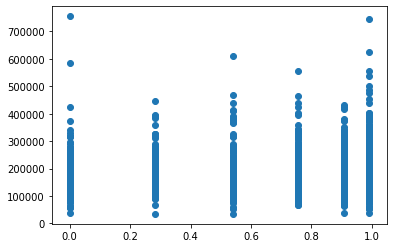

In [133]:
train_sin_month = train['MoSold'].apply(lambda x:np.sin((x-1)*np.pi/11))
plt.scatter(train_sin_month, train.SalePrice)

In [134]:
train_sin_month.corr(train.SalePrice)

-0.023463817624695828

**This doesn't help much, in fact the correlation went down slightly. It may be best to convert MoSold to a label, treating it as a categorical variable:**

In [135]:
train['MoSold'] = train['MoSold'].apply(str)
test['MoSold'] = test['MoSold'].apply(str)

**Before moving on to categorical features, let's see if we can remove some outliers. This is most noticeable in the SalePrice vs. GrLivArea plot:**

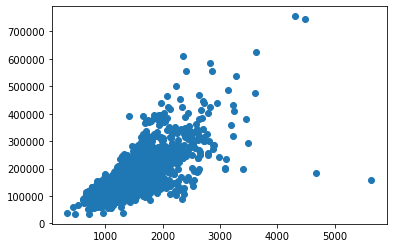

In [136]:
plt.scatter(train.GrLivArea, train.SalePrice)

In [137]:
train[train.GrLivArea > 4000]

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
523          60       RL        130.0    40094       1      0         2   
691          60       RL        104.0    21535       1      0         2   
1182         60       RL        160.0    15623       1      0         2   
1298         60       RL        313.0    63887       1      0         0   

      LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
523             2          3    Inside          2      Edwards       PosN   
691             3          3    Corner          2      NoRidge       Norm   
1182            3          3    Corner          2      NoRidge       Norm   
1298            2          3    Corner          2      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
523        762.0          5          3      PConc         5         3   
691       1170.0          5          3      PConc         5         3   
1182         0.0          4          3      PConc         5         3   
1298       796.0          5          3      PConc         5         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
523              4             6        2260             1           0   
691              4             6        1455             1           0   
1182             3             6        2096             1           0   
1298             4             6        5644             1           0   

      BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  \
523         878         3138    GasA          5           1      SBrkr   
691         989         2444    GasA          5           1      SBrkr   
1182        300         2396    GasA          5           1      SBrkr   
1298        466         6110    GasA          5           1      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
691       2444      1872             0       4316             0             1   
1182      2411      2065             0       4476             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
523          3         1             3             1            5   
691          3         1             4             1            5   
1182         3         1             4             1            5   
1298         2         1             3             1            5   

      TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu GarageType  \
523             11           7           1            4    BuiltIn   
691             10           7           2            5     Attchd   
1182            10           7           2            3     Attchd   
1298            12           7           3            4     Attchd   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
523        2007.0             3           3         884           3   
691        1994.0             3           3         832           3   
1182       1996.0             3           3         813  

**The creator of the Ames housing dataset actually recommends removing all houses with GrLivArea > 4000. I think this makes sense for the two largest houses in the dataset - the SalePrice clearly doesn't correlate with GrLivArea, and the reason for that is these two sales were partial sales (the house was not complete when sold). Let's remove these and look at the scatterplots again (all of them):**

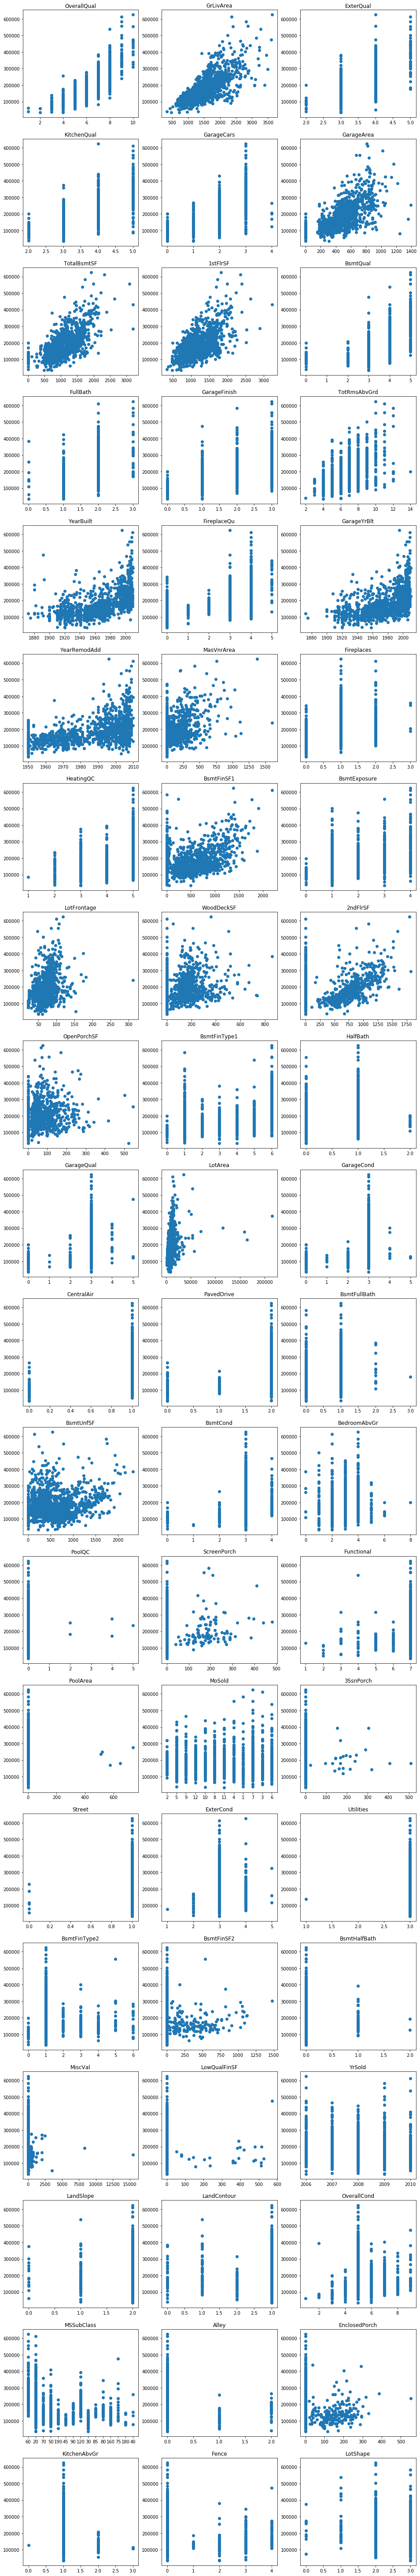

In [138]:
train = train[train.GrLivArea < 4000].reset_index(drop=True)
plots_vs_target(train, 'SalePrice', list(train_corr.index))

In [139]:
train.tail()

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
1451         60       RL         62.0     7917       1      0         3   
1452         20       RL         85.0    13175       1      0         3   
1453         70       RL         66.0     9042       1      0         3   
1454         20       RL         68.0     9717       1      0         3   
1455         20       RL         75.0     9937       1      0         3   

      LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
1451            3          3    Inside          2      Gilbert       Norm   
1452            3          3    Inside          2       NWAmes       Norm   
1453            3          3    Inside          2      Crawfor       Norm   
1454            3          3    Inside          2        NAmes       Norm   
1455            3          3    Inside          2      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1451       Norm     1Fam     2Story            6            5       1999   
1452       Norm     1Fam     1Story            6            6       1978   
1453       Norm     1Fam     2Story            7            9       1941   
1454       Norm     1Fam     1Story            5            6       1950   
1455       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1451          2000     Gable  CompShg     VinylSd     VinylSd       None   
1452          1988     Gable  CompShg     Plywood     Plywood      Stone   
1453          2006     Gable  CompShg     CemntBd     CmentBd       None   
1454          1996       Hip  CompShg     MetalSd     MetalSd       None   
1455          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
1451         0.0          3          3      PConc         4         3   
1452       119.0          3          3     CBlock         4         3   
1453         0.0          5          4      Stone         3         4   
1454         0.0          3          3     CBlock         3         3   
1455         0.0          4          3     CBlock         3         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
1451             1             1           0             1           0   
1452             1             5         790             3         163   
1453             1             6         275             1           0   
1454             2             6          49             3        1029   
1455             1             4         830             2         290   

      BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  \
1451        953          953    GasA          5           1      SBrkr   
1452        589         1542    GasA          3           1      SBrkr   
1453        877         1152    GasA          5           1      SBrkr   
1454          0         1078    GasA          4           1      FuseA   
1455        136         1256    GasA          4           1      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1451       953       694             0       1647             0             0   
1452      2073         0             0       2073             1             0   
1453      1188      1152             0       2340             0             0   
1454      1078         0             0       1078             1             0   
1455      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
1451         2         1             3             1            3   
1452         2         0             3             1            3   
1453         2         0             4             1            4   
1454         1         0             2             1            4   
1455         1  

**Now onto categorical variables - use boxplots to visualize how SalePrice varies with categorical features:**

In [140]:
cat_cols = list(train.select_dtypes(include=['object']).columns)

In [141]:
cat_cols

['MSSubClass',
 'MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [142]:
def boxplots_vs_target(df, target, cols):
    nrow_plot = len(cols)
    fig, ax = plt.subplots(nrow_plot, 1, figsize = (16, 6*nrow_plot))
    r = 0
    for col in cols:
        df.boxplot(column='SalePrice', by=col, ax=ax[r])
        fig.suptitle('')
        r += 1

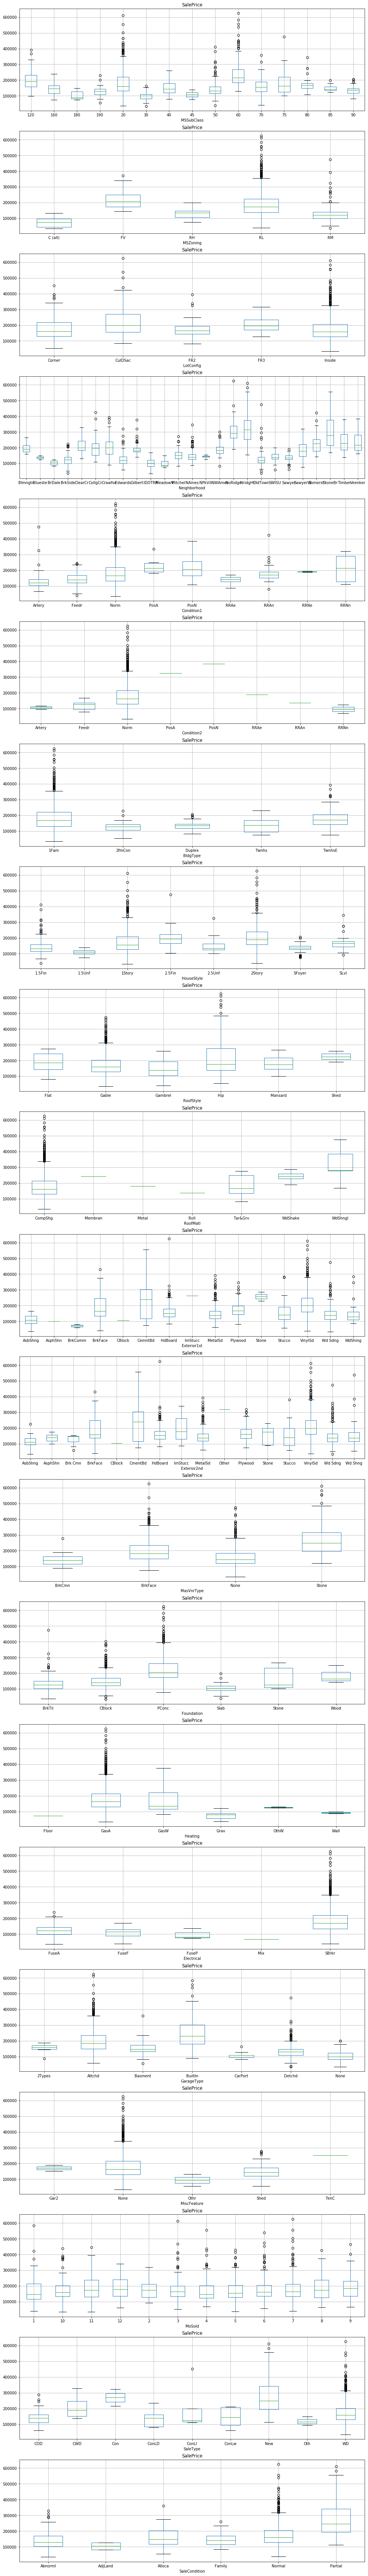

In [143]:
boxplots_vs_target(train, 'SalePrice', cat_cols)

In [144]:
for col in cat_cols:
    print(train[col].value_counts())
    print('')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Inside     1051
Corner      260
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1258
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm  

**Some observations here:**
- **SalePrice for certain MSSubClass stand out (all newer than 1946), which may already be captured in the YearBuilt feature.**
- **More suburban areas (residential low density and floating village) have higher sale prices.**
- **SalePrice varies significantly by Neighborhood. Out of all categorical variables, I would predict that Neighborhood is the most important predictor.**
- **It may be possible to make HouseStyle into an ordinal categorical variable, possibly giving it more importance in the model.**
- **Condition1 and Condition2 show which attributes positively/negatively impact SalePrice. Since these are split out into two features, I would think about how to combine them into one.**
- **I would also think about how to combine the Exterior1 and Exterior2 features into one.**
- **I nearly included Electrical as ordinal categorical in the first run. Looking at the boxplots, quality of the electrical system clearly scales with SalePrice.**
- **RoofMatl is a candidate for removal, since it is dominated in counts by one value (CompShg).**
- **Heating is a candidate for removal, since it is dominated in counts by one value (GasA).**
- **Since we already have MiscVal as a numerical feature and MiscFeatures is commonly None, consider removing MiscFeatures.**
- **Consider using the number of finished stories as a substitute for HouseStyle.**

**Converting Electrical to ordinal categorical and looking at the correlation with SalePrice:**

In [145]:
elec_encode = {}
elec_encode['Electrical'] = {'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4}
train = ordinal_encode(train, ['Electrical'], elec_encode)
test = ordinal_encode(test, ['Electrical'], elec_encode)

In [146]:
train.SalePrice.corr(train.Electrical)

0.23945774867649933

In [147]:
ord_features.append('Electrical')

**Last step before moving on - look at value counts for ordinal categorical variables:**

In [148]:
for col in ord_features:
    print(train[col].value_counts())
    print('')

3    906
4    487
5     49
2     14
Name: ExterQual, dtype: int64

3    1278
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

3    649
4    618
5    117
0     37
2     35
Name: BsmtQual, dtype: int64

3    1307
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

5    737
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

3    735
4    586
5     96
2     39
Name: KitchenQual, dtype: int64

0    690
4    378
3    312
2     33
5     23
1     20
Name: FireplaceQu, dtype: int64

3    1307
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

3    1322
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

0    1451
4       2
2       2
5       1
Name: PoolQC, dtype: int64

1    1450
0       6
Name: Street, dtype: int64

0    1365
1      50
2      41
Name: Alley, dtype: int64

3    925
2    481
1     41
0      9
Name: LotShape, dtype: int64

3    1309
2      61
1      50
0      36
Na

**Based on this, we should also consider removing Street, Utilities, and PoolQC.**

# Step 3a: Feature Engineering

**Candidates for feature engineering include:**
- **Creating a feature for total number of bathrooms**
- **Creating a total square footage feature**
- **Grouping all basement finished/unfinished features into one**
- **Grouping Condition1/2 (dummify first, then combine)**
- **Grouping Exterior1/2 (dummify first, then combine)**
- **Consider removing the pools features or combining them into another**
- **Consider grouping all porch features**
- **Consider removing the Utilities and RoofMatl features**

**I'll aim to develop better predictors in feature engineering, and also to develop features that have more explainability than the original ones (in other words, easier to explain the model to an audience). In evaluating engineered vs. original features, I will do a comparison of how each correlates with SalePrice.**

**Before diving into feature engineering, let's look at a correlation matrix between all variables to see if there is any multicollinearity that we should consider:**

In [149]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
num_cols = [x for x in train.columns if x not in cat_cols]

In [150]:
def corr_matrix(df, num_cols):
    df_corrs = df[num_cols].corr().round(2)
    mask = np.zeros_like(df_corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(30, 30))
    cmap = sns.diverging_palette(250, 250, s=100, l=20, as_cmap=True)
    sns.heatmap(df_corrs, annot=df_corrs, mask=mask, cmap=cmap, center=0, linewidths=.5, cbar=False)

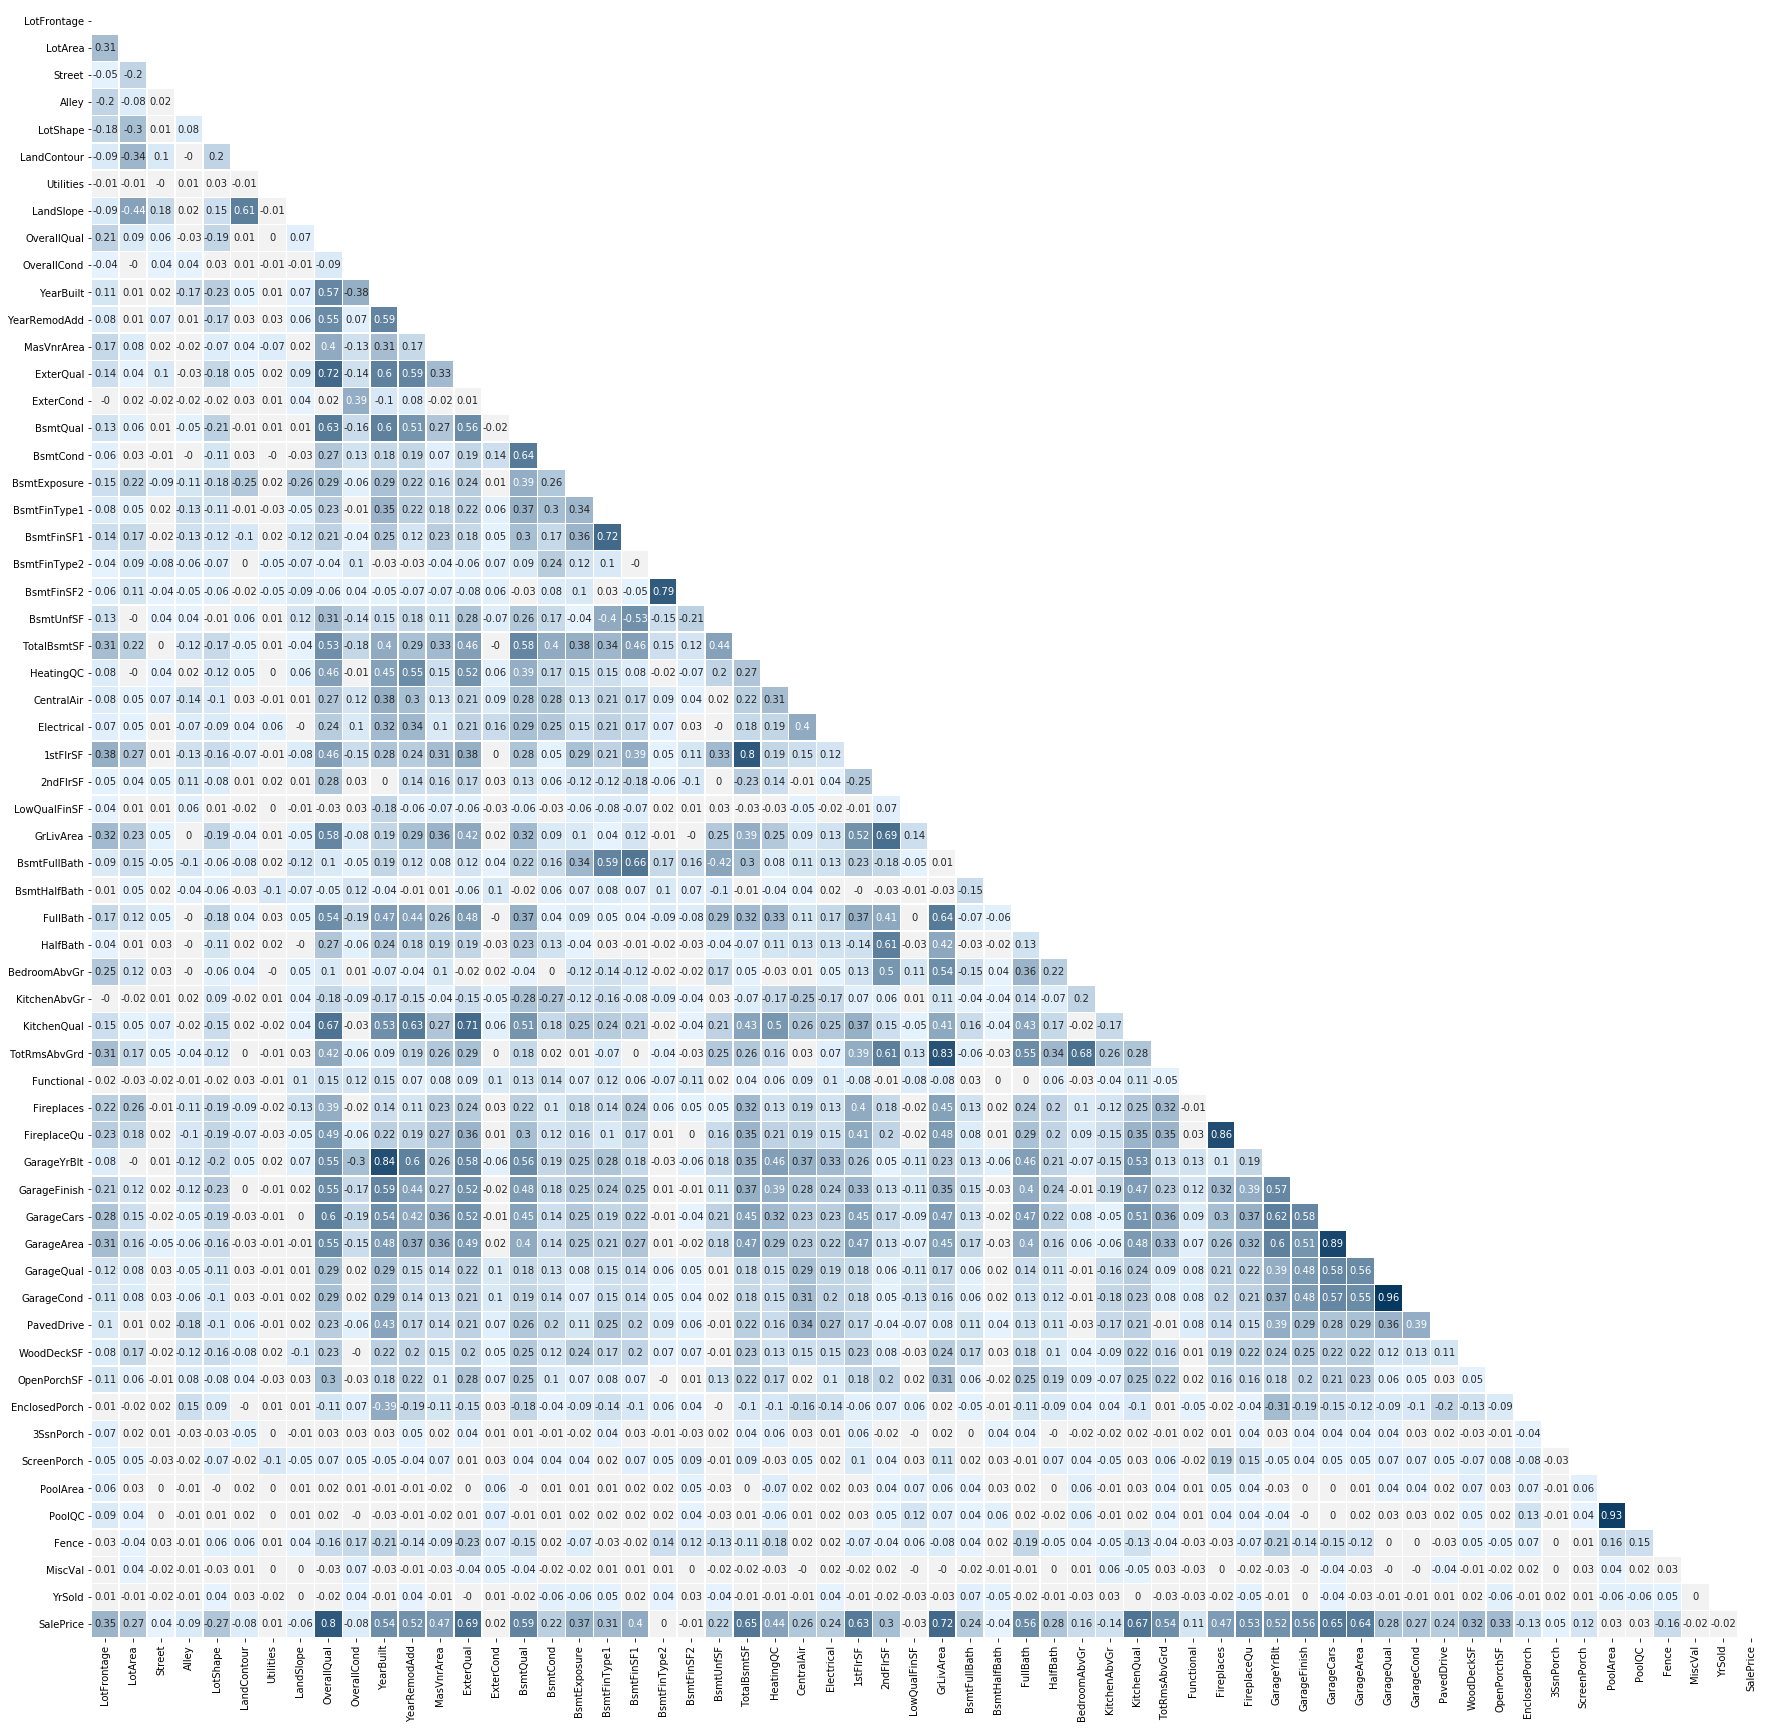

In [151]:
corr_matrix(train, num_cols)

**Taking the correlations and some physical intuition into account, here are some candidates for combined features:**

- YearBuilt and GarageYrBlt: it would make sense that for most houses, these will be the same or similar
- 1stFlrSF and TotalBsmtSF: makes sense because the 1st floor is built directly above the basement and will have a similar SF, this should be taken care of in creating the total SF feature
- TotalRmsAbvGrd and GrLivArea: intuitively, more rooms means more living area
- Fireplaces and FireplaceQu: skewed correlation due to houses having no fireplaces also having a score of 0 for FireplaceQu?
- GarageArea and GarageCars: same intuition here as rooms vs. living area
- GarageCond and GarageQual: can we combine into one total quality/condition feature?
- PoolQC and PoolArea: as we discovered before, there are very few pools in the dataset and these features can either be removed or converted to a one-hot encoding (0 = no pool, 1 = pool)


**Let's look at these pairs one by one:**

## YearBuilt and GarageYrBlt

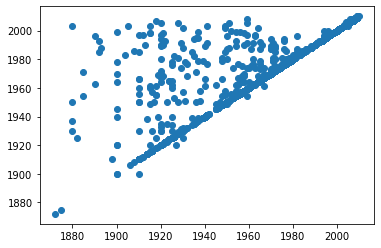

In [152]:
plt.scatter(train.YearBuilt, train.GarageYrBlt)

**First observation here is that the majority of houses lie on the 1:1 line, meaning that the garage and house were built in the same year. There are also many houses where the garage was built later, and just a few where the garage was built first.**

**Let's try using ages of when the house was sold rather than years and see how correlations with SalePrice and the cross-correlation between HouseAge and GarageAge look:**

In [153]:
HouseAge = train.YrSold-train.YearBuilt
GarageAge = train.YrSold-train.GarageYrBlt
RemodelAge = train.YrSold-train.YearRemodAdd

In [154]:
for feature in [HouseAge, GarageAge, RemodelAge]:
    print(train.SalePrice.corr(feature))

-0.5355073687597526
-0.5209299477868039
-0.5231017377805351


**Correlations are negative because lower age (newer houses) correlate with higher sale prices. How do these correlate with each other?**

In [155]:
print("HouseAge with GarageAge: "+str(HouseAge.corr(GarageAge)))
print("HouseAge with RemodelAge: "+str(HouseAge.corr(RemodelAge)))
print("GarageAge with RemodelAge: "+str(GarageAge.corr(RemodelAge)))

HouseAge with GarageAge: 0.8452309265719693
HouseAge with RemodelAge: 0.5932052205470948
GarageAge with RemodelAge: 0.6045579907725613


**HouseAge with GarageAge is still an issue with high multicollinearity. Try using the difference in age between the garage and house instead of GarageAge:**

In [156]:
DiffAge = GarageAge-HouseAge

In [157]:
print("HouseAge with DiffAge: "+str(HouseAge.corr(DiffAge)))
print("RemodelAge with DiffAge: "+str(RemodelAge.corr(DiffAge)))
print("SalePrice with DiffAge: "+str(train.SalePrice.corr(DiffAge)))

HouseAge with DiffAge: -0.49261227677852937
RemodelAge with DiffAge: -0.12422443157035995
SalePrice with DiffAge: 0.1525697933460874


**DiffAge isn't too well correlated with SalePrice, but multicollinearity is no longer an issue here.**

**Based on what we found, let's remove the following features: YearBuilt, GarageYrBlt, YearAddRemod, YrSold**

**And replace them with the following features:**
- **HouseAge = YrSold-YearBuilt**
- **DiffGarageAge = GarageYrBlt-YearBuilt**
- **RemodelAge = YearAddRemod-YearBuilt**

In [158]:
def age_features(df):
    df_new = df.copy()
    df_new['HouseAge'] = df.YrSold-df.YearBuilt
    df_new['DiffGarageAge'] = df.GarageYrBlt-df.YearBuilt
    df_new['RemodelAge'] = df.YearRemodAdd-df.YearBuilt
    df_new = df_new.drop(columns=['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'])
    return df_new

In [159]:
train_old = train.copy()
test_old = test.copy()

In [160]:
train = age_features(train_old)
test = age_features(test_old)

In [161]:
train[['HouseAge','DiffGarageAge','RemodelAge']].describe()

HouseAge  DiffGarageAge   RemodelAge
count  1456.000000    1456.000000  1456.000000
mean     36.631868       5.254121    13.633929
std      30.247555      16.183526    24.500423
min       0.000000     -10.000000     0.000000
25%       8.000000       0.000000     0.000000
50%      35.000000       0.000000     0.000000
75%      54.000000       0.000000    20.000000
max     136.000000     123.000000   123.000000

In [162]:
test[['HouseAge','DiffGarageAge','RemodelAge']].describe()

HouseAge  DiffGarageAge   RemodelAge
count  1459.000000    1459.000000  1459.000000
mean     36.411926       4.642221    12.305003
std      30.432248      15.538024    23.638064
min      -1.000000     -20.000000    -1.000000
25%       7.000000       0.000000     0.000000
50%      34.000000       0.000000     0.000000
75%      55.000000       0.000000    13.000000
max     129.000000     201.000000   127.000000

## TotRmsAbvGrd and GrLivArea

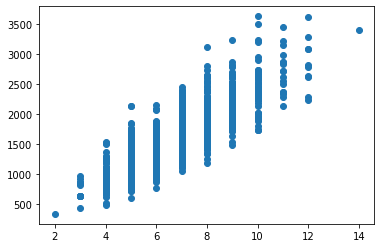

In [163]:
plt.scatter(train.TotRmsAbvGrd, train.GrLivArea)

**Can we create a better feature from these two? Both correlate positively with SalePrice:**

In [164]:
train.SalePrice.corr(train.TotRmsAbvGrd)

0.5374617670292888

In [165]:
train.SalePrice.corr(train.GrLivArea)

0.720516300673873

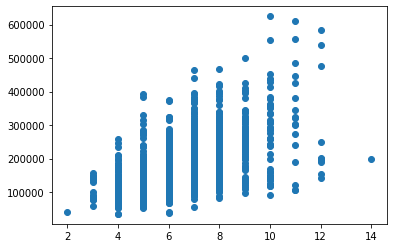

In [166]:
plt.scatter(train.TotRmsAbvGrd, train.SalePrice)

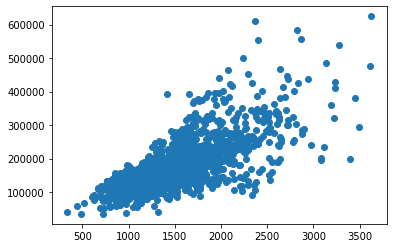

In [167]:
plt.scatter(train.GrLivArea, train.SalePrice)

**Let's try average room size (GrLivArea/TotRmsAbvGrd) and GrLivArea multiplied by TotRmsAbvGrd:**

In [168]:
train.SalePrice.corr(train.GrLivArea/train.TotRmsAbvGrd)

0.5308708964836995

In [169]:
train.SalePrice.corr(train.GrLivArea*train.TotRmsAbvGrd)

0.6605817111151434

**Neither are as well correlated with SalePrice as GrLivArea alone. I can't think of a physically intuitive way to combine these two features, and both seem to be relatively good predictors of SalePrice. Let's just leave them in for now, and see if they drop out during feature selection when we start to fit models.**

## Fireplaces and FireplaceQu

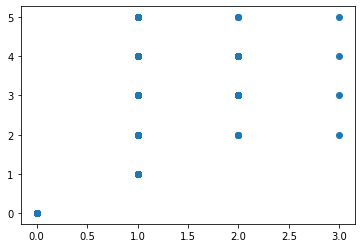

In [170]:
plt.scatter(train.Fireplaces, train.FireplaceQu)

In [171]:
train[['Fireplaces','FireplaceQu','SalePrice']].groupby(['Fireplaces','FireplaceQu']).count().reset_index()

Fireplaces  FireplaceQu  SalePrice
0            0            0        690
1            1            1         20
2            1            2         28
3            1            3        259
4            1            4        323
5            1            5         19
6            2            2          4
7            2            3         52
8            2            4         54
9            2            5          3
10           3            2          1
11           3            3          1
12           3            4          1
13           3            5          1

In [172]:
train.SalePrice.corr(train.Fireplaces)

0.46676528347165447

In [173]:
train.SalePrice.corr(train.FireplaceQu)

0.5288410187654442

**First observation is that there are few houses with three fireplaces, and as shown in the scatterplots before, the presence of a third fireplace doesn't correlate with a higher SalePrice. Let's treat 3 fireplaces and 2 fireplaces as the same (so essentially changing Fireplaces from number of fireplaces to an indicator for an extra fireplace: 0 = no extra fireplace, 1 = at least one extra fireplace), and add on the FireplaceQu score:**

In [174]:
FireplaceScr = train.Fireplaces.apply(lambda x:x if x==0 else (x-2 if x>2 else x-1))+train.FireplaceQu

In [175]:
train.SalePrice.corr(FireplaceScr)

0.5322666574456137

**This is a marginally better feature, but more importantly it combines the two fireplace features into one, eliminating the possibility of multicollinearity. The FireplaceScore equals the FireplaceQu plus one additional point if there is an extra fireplace.**

In [176]:
train['FireplaceScr'] = train.Fireplaces.apply(lambda x:x if x==0 else (x-2 if x>2 else x-1))+train.FireplaceQu
test['FireplaceScr'] = test.Fireplaces.apply(lambda x:x if x==0 else (x-2 if x>2 else x-1))+test.FireplaceQu
train = train.drop(columns=['Fireplaces','FireplaceQu'])
test = test.drop(columns=['Fireplaces','FireplaceQu'])

## GarageQual and GarageCond

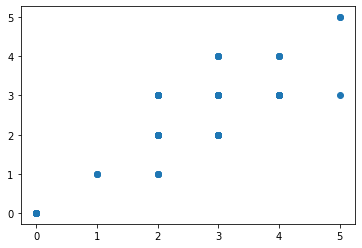

In [177]:
plt.scatter(train.GarageQual, train.GarageCond)

In [178]:
train.SalePrice.corr(train.GarageQual)

0.2814191923522569

In [179]:
train.SalePrice.corr(train.GarageCond)

0.2703431407880025

**Can we just add the two to get a better predictor?**

In [180]:
train.SalePrice.corr(train.GarageQual+train.GarageCond)

0.27875398204341784

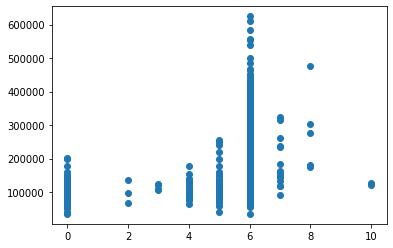

In [181]:
plt.scatter(train.GarageQual+train.GarageCond, train.SalePrice)

**There isn't a huge loss in correlation, and combining the two gets rid of any multicollinearity. Let's go ahead with it:**

In [182]:
def add_garage_qual_feature(df):
    df_new = df.copy()
    df_new['GarageQualCond'] = df.GarageQual+df.GarageCond
    df_new = df_new.drop(columns=['GarageQual','GarageCond'])
    return df_new

In [183]:
train_old = train.copy()
test_old = test.copy()

In [184]:
train = add_garage_qual_feature(train_old)
test = add_garage_qual_feature(test_old)

In [185]:
train.GarageQualCond.describe()

count    1456.000000
mean        5.618132
std         1.429604
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max        10.000000
Name: GarageQualCond, dtype: float64

In [186]:
test.GarageQualCond.describe()

count    1459.000000
mean        5.604524
std         1.383027
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: GarageQualCond, dtype: float64

## GarageArea and GarageCars

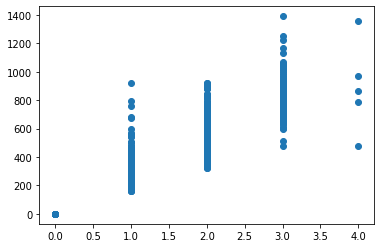

In [187]:
plt.scatter(train.GarageCars, train.GarageArea)

**Like TotRmsAbvGrd and GrLivArea, it makes sense that these two are correlated.**

In [188]:
train.SalePrice.corr(train.GarageCars)

0.6492563342986541

In [189]:
train.SalePrice.corr(train.GarageArea)

0.6369635930259978

**These two features are especially well correlated - on their own, they would contribute to a VIF of 4.4 (nearly already at the threshold of 5 where we would consider combining or dropping them).**

**Let's try average garage space size (GarageArea/GarageCars):**

In [190]:
train.SalePrice.corr(train.GarageArea/train.GarageCars)

-0.01350961939225087

**GarageArea times GarageCars gives a slightly better correlation. It doesn't have much physical sense, but is easy to explain and calculate. Let's go with it for now:**

In [191]:
train.SalePrice.corr(train.GarageArea*train.GarageCars)

0.6893771992638233

In [192]:
train['GarageAreaCars'] = train.GarageArea*train.GarageCars
test['GarageAreaCars'] = test.GarageArea*test.GarageCars
train = train.drop(columns=['GarageArea','GarageCars'])
test = test.drop(columns=['GarageArea','GarageCars'])

## Pools

**Since there are so few pools in the dataset, let's just remove PoolQC and PoolArea, and create an indicator variable for if a pool exists (0 = no pool, 1 = pool):**

In [193]:
def add_pool_feature(df):
    df_new = df.copy()
    df_new['Pool'] = df.PoolArea.apply(lambda x:0 if x==0 else 1)
    df_new = df_new.drop(columns=['PoolQC','PoolArea'])
    return df_new

In [194]:
train_old = train.copy()
test_old = test.copy()

In [195]:
train = add_pool_feature(train)
test = add_pool_feature(test)

In [196]:
train.Pool.value_counts()

0    1451
1       5
Name: Pool, dtype: int64

In [197]:
test.Pool.value_counts()

0    1453
1       6
Name: Pool, dtype: int64

In [198]:
ord_features.append('Pool')

**Before going onto other new features, check that most of our multicollinearity has been solved:**

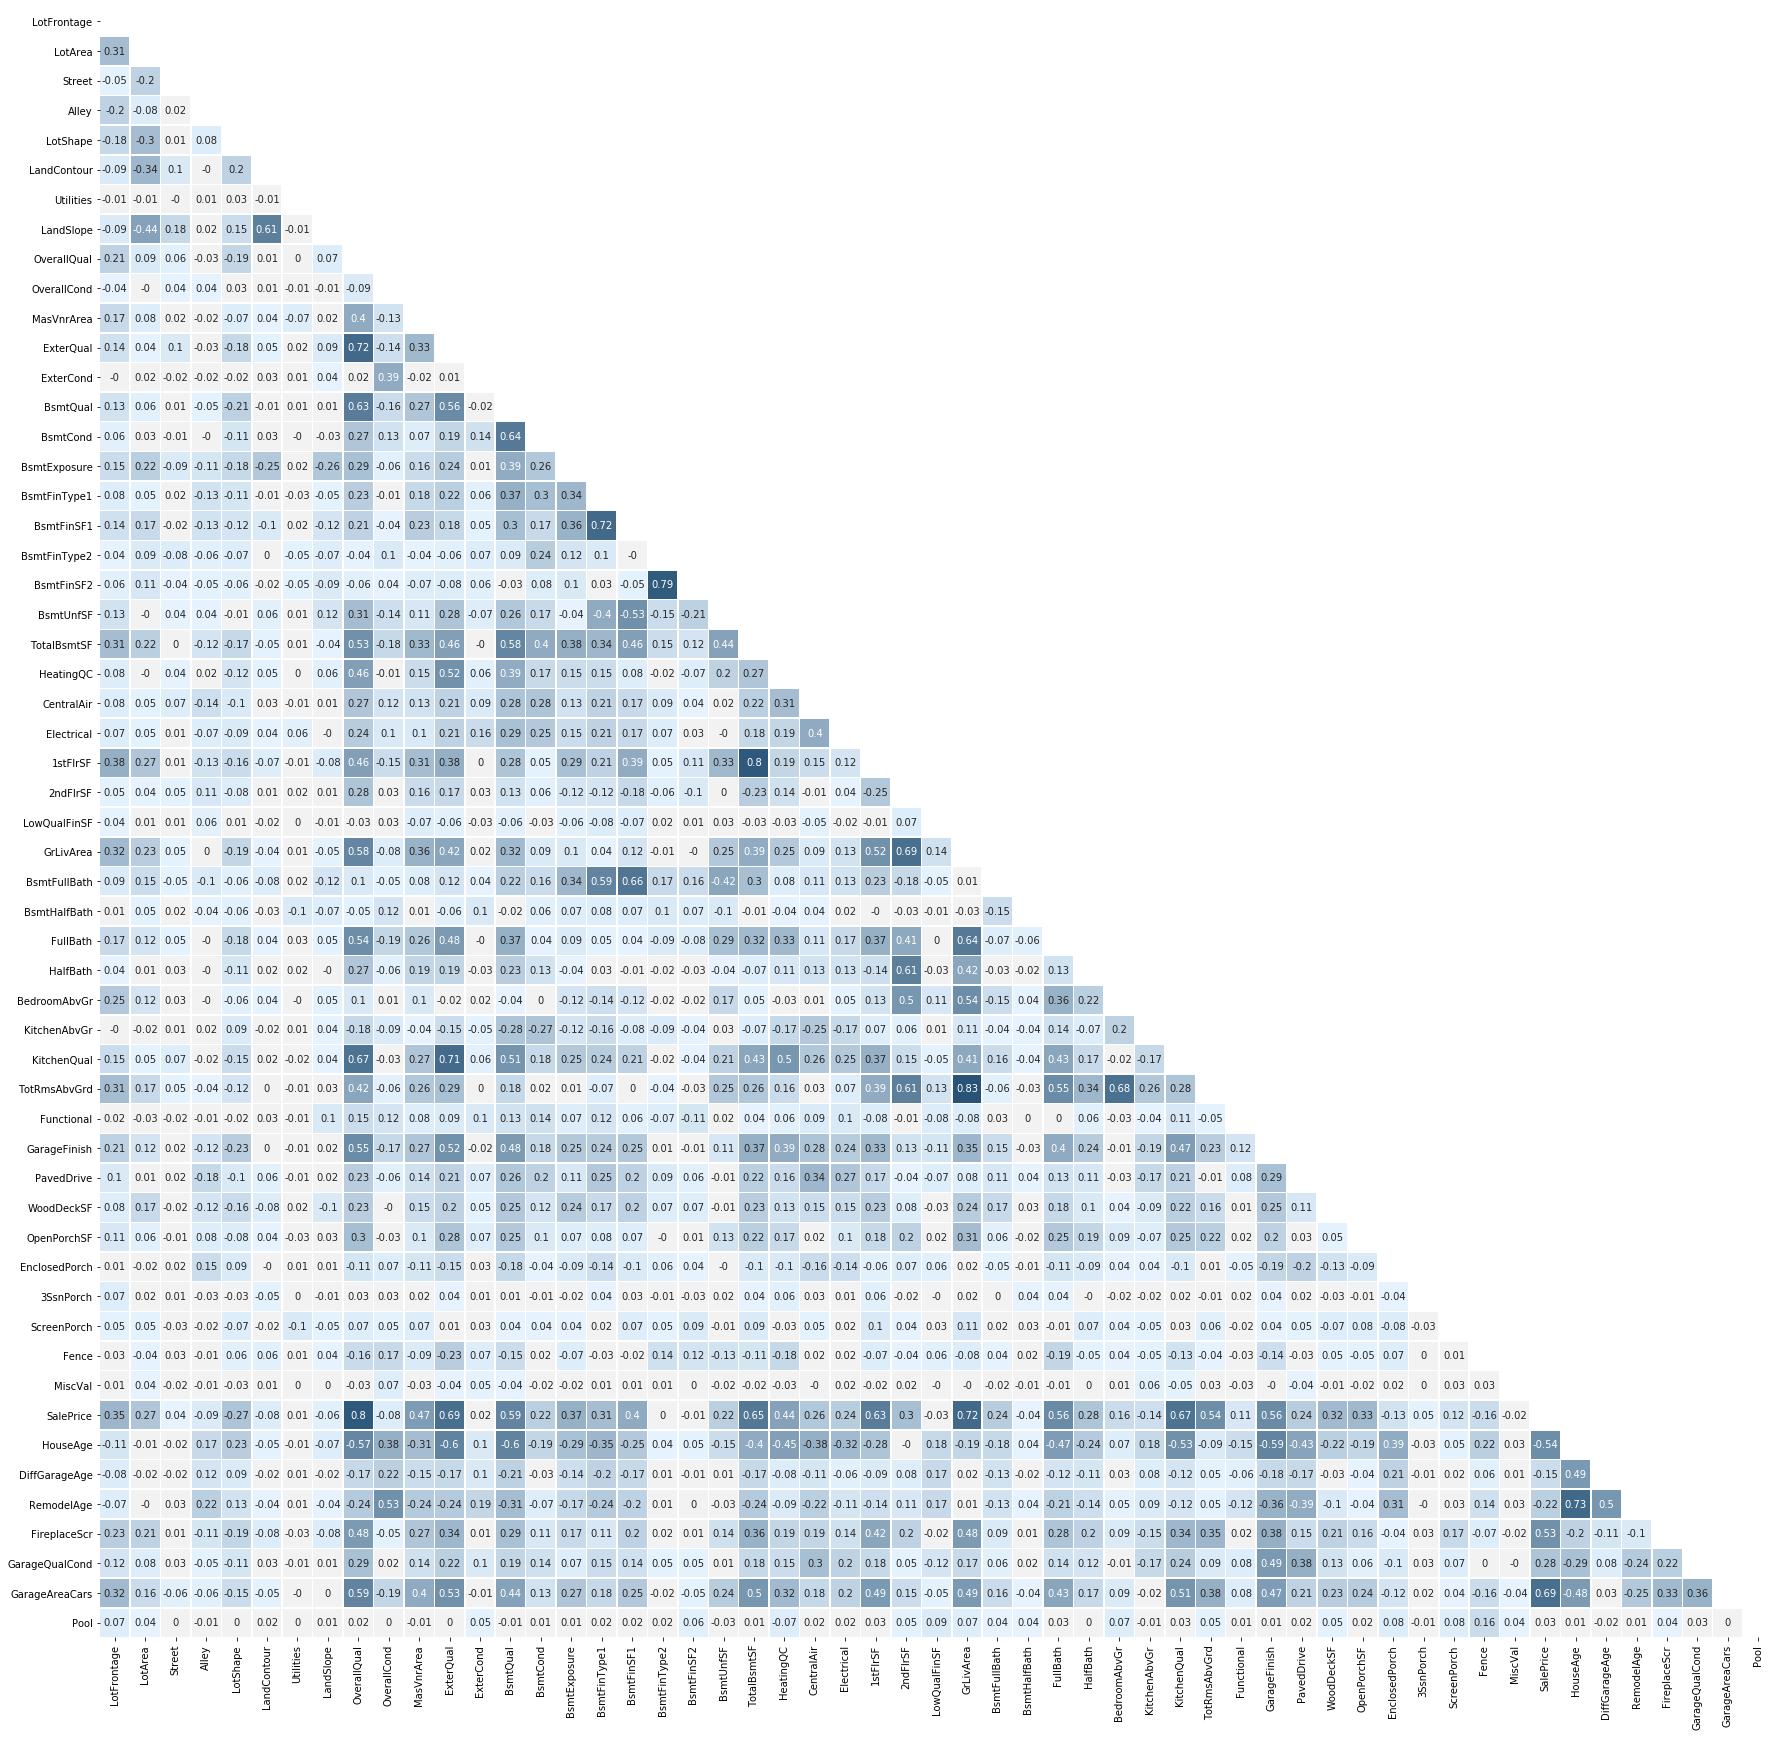

In [199]:
num_cols = [x for x in train.columns if x not in cat_cols]
corr_matrix(train, num_cols)

**The only remaining traces of possible multicollinearity are for pairs we already analyzed or for pairs where the next steps in feature engineering may solve things. Let's proceed:**

## Bathroom Features (FullBath, HalfBath, BsmtFullBath, BsmtHalfBath)

**Houses are commonly listed with total number of bathrooms (e.g. 3.5) rather than breaking them out by full/half and location (e.g. 2 full baths, 0.5 half baths, 1 full bath in the basement). Let's see if correlation with SalePrice does better with total bathrooms:**

In [200]:
TotalBath = train.FullBath+0.5*train.HalfBath+train.BsmtFullBath+0.5*train.BsmtHalfBath

In [201]:
TotalBath.corr(train.SalePrice)

0.6359391731674814

In [202]:
bath_features = ['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']
train_corr[bath_features]

FullBath        0.560664
HalfBath        0.284108
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
dtype: float64

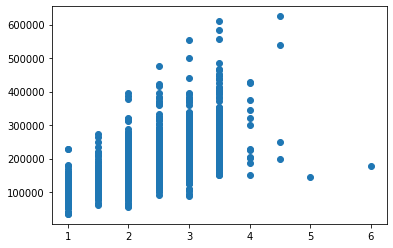

In [203]:
plt.scatter(TotalBath,train.SalePrice)

**We should keep the two outliers in mind here (more bathrooms but lower SalePrice), but overall the combined feature looks like a better predictor than each of the individual features. It is also more explainable and relates better to how houses are actually listed. Let's keep it and drop the rest:**

In [204]:
train['TotalBath'] = train.FullBath+0.5*train.HalfBath+train.BsmtFullBath+0.5*train.BsmtHalfBath
test['TotalBath'] = test.FullBath+0.5*test.HalfBath+test.BsmtFullBath+0.5*test.BsmtHalfBath
train = train.drop(columns=bath_features)
test = test.drop(columns=bath_features)

In [205]:
train.TotalBath.describe()

count    1456.000000
mean        2.204670
std         0.778141
min         1.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.000000
Name: TotalBath, dtype: float64

In [206]:
test.TotalBath.describe()

count    1459.000000
mean        2.226182
std         0.831834
min         1.000000
25%         1.500000
50%         2.000000
75%         3.000000
max         7.000000
Name: TotalBath, dtype: float64

## Square Footage Features (1stFlrSF, 2ndFlrSF, TotalBsmtSF, LowQualFinSF, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF)

**We can also bring in BsmtFinType1 and BsmtFinType2 as potential weighting factors here.**

**First let's see how well each correlates with SalePrice:**

In [207]:
sf_features = ['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
for feature in sf_features:
    print(feature+" correlation with SalePrice: "+str(train.SalePrice.corr(train[feature])))

1stFlrSF correlation with SalePrice: 0.6252347186514534
2ndFlrSF correlation with SalePrice: 0.29730130233118685
TotalBsmtSF correlation with SalePrice: 0.646584497930071
LowQualFinSF correlation with SalePrice: -0.025350635768713353
BsmtFinSF1 correlation with SalePrice: 0.3959231082743963
BsmtFinSF2 correlation with SalePrice: -0.00889991086155107
BsmtUnfSF correlation with SalePrice: 0.22067782765790755


In [208]:
def corr_sf(df, sf_features):
    return(df.SalePrice.corr(train[sf_features].sum(axis=1)))

**Try total SF first (1stFlr + 2ndFlr + TotalBsmt):**

In [209]:
corr_sf(train,['1stFlrSF','2ndFlrSF','TotalBsmtSF'])

0.8250659965540701

**Looks like a much better predictor, let's try just finished square footage (1stFlr + 2ndFlr + BsmtFin1 + BsmtFin2):**

In [210]:
corr_sf(train,['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2'])

0.7466218317993024

**Not as good, what if we subtract off LowQualFinSF from the total:**

In [211]:
train.SalePrice.corr(train[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].sum(axis=1)-train['LowQualFinSF'])

0.8256546882579717

**This is likely the best predictor we can create out of the square footage variables, let's go for it:**

In [212]:
train['HighQualSF'] = train[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].sum(axis=1)-train['LowQualFinSF']
test['HighQualSF'] = test[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].sum(axis=1)-test['LowQualFinSF']
train = train.drop(columns=['1stFlrSF','2ndFlrSF','TotalBsmtSF','LowQualFinSF'])
test = test.drop(columns=['1stFlrSF','2ndFlrSF','TotalBsmtSF','LowQualFinSF'])

**We should take a closer look at the basement SF and finish features:**

In [213]:
bsmt_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','BsmtFinType1','BsmtFinType2']
for feature in bsmt_features:
    print(feature+" correlation with SalePrice: "+str(train.SalePrice.corr(train[feature])))

BsmtFinSF1 correlation with SalePrice: 0.3959231082743963
BsmtFinSF2 correlation with SalePrice: -0.00889991086155107
BsmtUnfSF correlation with SalePrice: 0.22067782765790755
BsmtFinType1 correlation with SalePrice: 0.30511447260452335
BsmtFinType2 correlation with SalePrice: 0.0034839166597455677


**If we just sum the bsmt square footages, we should get the same correlation compared to TotalBsmtSF:**

In [214]:
corr_sf(train,['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])

0.646584497930071

In [215]:
train.SalePrice.corr(train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].sum(axis=1)-train.BsmtUnfSF)

0.37357605888198187

**Can we get a better predictor than this? Let's try using the BsmtFinType features as "weights". We'll only count square footages for basements that can be used as living spaces similarly to above ground rooms (BsmtFinType = GLQ, ALQ or BLQ), then add BsmtUnfSF to the "livable" basement square footage. In other words, we're dropping low quality space, similar to what we did for total square footage:**

In [216]:
BsmtSFWeight = train.BsmtFinSF1*train.BsmtFinType1.apply(lambda x:0 if x < 4 else 1) + train.BsmtFinSF2*train.BsmtFinType2.apply(lambda x:0 if x < 4 else 1) + train.BsmtUnfSF
train.SalePrice.corr(BsmtSFWeight)

0.6539611893889025

**This is a slightly better feature than TotalBsmtSF, and consistent with the method we used to quantify total square footage. It also has the advantage of combining 5 features into one, improving model interpretability.**

In [217]:
train['HighQualBsmtSF'] = train.BsmtFinSF1*train.BsmtFinType1.apply(lambda x:0 if x < 4 else 1) + train.BsmtFinSF2*train.BsmtFinType2.apply(lambda x:0 if x < 4 else 1) + train.BsmtUnfSF
test['HighQualBsmtSF'] = test.BsmtFinSF1*test.BsmtFinType1.apply(lambda x:0 if x < 4 else 1) + test.BsmtFinSF2*test.BsmtFinType2.apply(lambda x:0 if x < 4 else 1) + test.BsmtUnfSF
train = train.drop(columns=bsmt_features)
test = test.drop(columns=bsmt_features)

In [218]:
train.HighQualBsmtSF.describe()

count    1456.000000
mean      959.806319
std       456.560921
min         0.000000
25%       686.000000
50%       912.000000
75%      1243.250000
max      3206.000000
Name: HighQualBsmtSF, dtype: float64

In [219]:
test.HighQualBsmtSF.describe()

count    1459.000000
mean      957.624400
std       488.282205
min         0.000000
25%       649.000000
50%       918.000000
75%      1258.000000
max      5095.000000
Name: HighQualBsmtSF, dtype: float64

**One last thing, can we combine HighQualBsmtSF with BsmtQual to get a proxy for high quality basement volume?**

In [220]:
train.BsmtQual.value_counts()

3    649
4    618
5    117
0     37
2     35
Name: BsmtQual, dtype: int64

**Let's map BsmtQual to actual measures: 2 = 75 inches, 3 = 85 inches, 4 = 95 inches, 5 = 105 inches)**

In [221]:
dict_BsmtQual = {0:0, 2:75/12, 3:85/12, 4:95/12, 5:105/12}
BsmtQual_new = train.BsmtQual.map(lambda x:dict_BsmtQual[x])

In [222]:
BsmtQual_new.value_counts()

7.083333    649
7.916667    618
8.750000    117
0.000000     37
6.250000     35
Name: BsmtQual, dtype: int64

In [223]:
HighQualBsmtVol = train.HighQualBsmtSF*BsmtQual_new
train.SalePrice.corr(HighQualBsmtVol)

0.7103198922987076

**This is a better feature than both HighQualBsmtSF and BsmtQual individually. Let's go with it:**

In [224]:
train['HighQualBsmtVol'] = train.BsmtQual.map(lambda x:dict_BsmtQual[x])*train.HighQualBsmtSF
test['HighQualBsmtVol'] = test.BsmtQual.map(lambda x:dict_BsmtQual[x])*test.HighQualBsmtSF
train = train.drop(columns=['BsmtQual','HighQualBsmtSF'])
test = test.drop(columns=['BsmtQual','HighQualBsmtSF'])

## Deck/Porch Square Footage Features (WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch)

**It would make most sense to calculate a total deck/porch square footage and see how that correlates with SalePrice vs. each individual feature:**

In [225]:
porch_features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
for feature in porch_features:
    print(feature+" correlation with SalePrice: "+str(train.SalePrice.corr(train[feature])))

WoodDeckSF correlation with SalePrice: 0.3225378644620933
OpenPorchSF correlation with SalePrice: 0.3303607759151998
EnclosedPorch correlation with SalePrice: -0.12977381709855618
3SsnPorch correlation with SalePrice: 0.04741411931300733
ScreenPorch correlation with SalePrice: 0.11832434040783679


In [226]:
DeckPorchSF = train[porch_features].sum(axis=1)

In [227]:
train.SalePrice.corr(DeckPorchSF)

0.3974003741822624

**This does seem to be a better feature than the 5 individual features. Let's go ahead and replace them:**

In [228]:
train['DeckPorchSF'] = train[porch_features].sum(axis=1)
test['DeckPorchSF'] = test[porch_features].sum(axis=1)
train = train.drop(columns=porch_features)
test = test.drop(columns=porch_features)

In [229]:
train.DeckPorchSF.describe()

count    1456.000000
mean      180.590659
std       156.078859
min         0.000000
25%        45.000000
50%       164.000000
75%       265.000000
max      1027.000000
Name: DeckPorchSF, dtype: float64

In [230]:
test.DeckPorchSF.describe()

count    1459.000000
mean      184.590816
std       163.357084
min         0.000000
25%        51.000000
50%       166.000000
75%       268.000000
max      1424.000000
Name: DeckPorchSF, dtype: float64

## Dropping Utilities, RoofMatl, Heating, Street

**Looking at the value counts for these categorical variables again:**

In [231]:
train.Utilities.value_counts()

3    1455
1       1
Name: Utilities, dtype: int64

In [232]:
test.Utilities.value_counts()

3    1459
Name: Utilities, dtype: int64

In [233]:
train.RoofMatl.value_counts()

CompShg    1432
Tar&Grv      11
WdShngl       5
WdShake       5
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [234]:
test.RoofMatl.value_counts()

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64

In [235]:
train.Heating.value_counts()

GasA     1424
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [236]:
test.Heating.value_counts()

GasA    1446
GasW       9
Wall       2
Grav       2
Name: Heating, dtype: int64

In [237]:
train.Street.value_counts()

1    1450
0       6
Name: Street, dtype: int64

In [238]:
test.Street.value_counts()

1    1453
0       6
Name: Street, dtype: int64

**The values in these fields are predominantly of one value, offering little value to the model. Dropping them:**

In [239]:
train = train.drop(columns=['Utilities','RoofMatl','Heating','Street'])
test = test.drop(columns=['Utilities','RoofMatl','Heating','Street'])

## MiscFeature and MiscVal

**Is MiscFeature really necessary when we already have MiscVal?**

In [240]:
train.SalePrice.corr(train.MiscVal)

-0.02109677046027814

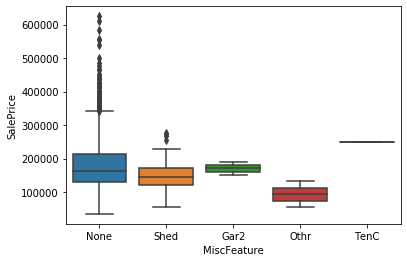

In [241]:
sns.boxplot(train.MiscFeature, train.SalePrice)

In [242]:
train.MiscFeature.value_counts()

None    1402
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [243]:
test.MiscFeature.value_counts()

None    1408
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64

**Most houses don't have a misc feature anyways, and the value of the features is already in MiscVal. Let's drop MiscFeature:**

In [244]:
train = train.drop(columns=['MiscFeature'])
test = test.drop(columns=['MiscFeature'])

In [245]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'HouseAge',
       'DiffGarageAge', 'RemodelAge', 'FireplaceScr', 'GarageQualCond',
       'GarageAreaCars', 'Pool', 'TotalBath', 'HighQualSF', 'HighQualBsmtVol',
       'DeckPorchSF'],
      dtype='object')

# Step 3b: Transformations

**First let's pull out and look at the target variable, SalePrice:**

In [246]:
sale_price = train.SalePrice
train = train.drop(columns=['SalePrice'])

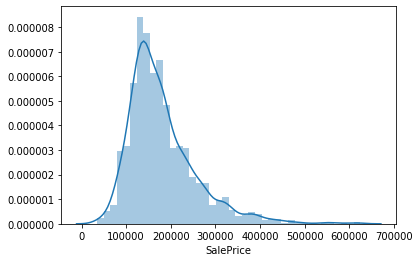

In [247]:
sns.distplot(sale_price)

In [248]:
sale_price.skew()

1.5659592925562151

**SalePrice looks positively skewed, and the skewness of 1.9 confirms that it is positively skewed. A log transform would be helpful here:**

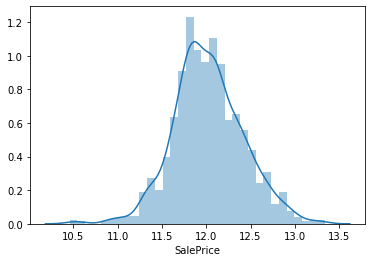

In [249]:
log_sale_price = np.log1p(sale_price)
sns.distplot(log_sale_price)

In [250]:
log_sale_price.skew()

0.06546006911025826

**Looks a lot better. The log of SalePrice is our new target variable.**

train.dtypes

**Now look at the skewness of each feature. Those with high skewness are candidates for a Box-Cox transformation. Since the same transformation needs to be applied to all data, let's concatenate the train and test sets first:**

In [251]:
all_data = pd.concat([train,test]).reset_index(drop=True)

In [252]:
all_data.shape

(2915, 54)

In [253]:
train.index[-1]

1455

In [254]:
num_cols = all_data.select_dtypes(include=['int64','float64']).columns
num_cols = [x for x in num_cols if x not in ord_features]
all_data_num = all_data[num_cols]
all_data_skew = all_data_num.apply(lambda x:x.skew()).sort_values(ascending=False)

In [255]:
all_data_skew

MiscVal            21.943440
LotArea            13.130516
KitchenAbvGr        4.301059
DiffGarageAge       4.069573
MasVnrArea          2.602036
RemodelAge          2.062560
GarageAreaCars      1.423397
DeckPorchSF         1.382317
LotFrontage         1.092513
GrLivArea           0.978364
HighQualSF          0.924176
HighQualBsmtVol     0.890820
TotRmsAbvGrd        0.749965
HouseAge            0.597220
OverallCond         0.569436
TotalBath           0.483422
BedroomAbvGr        0.328298
FireplaceScr        0.215047
OverallQual         0.181995
GarageQualCond     -3.449957
dtype: float64

In [256]:
features_skew = list(all_data_skew[np.absolute(all_data_skew) > 0.5].index)

In [257]:
features_skew

['MiscVal',
 'LotArea',
 'KitchenAbvGr',
 'DiffGarageAge',
 'MasVnrArea',
 'RemodelAge',
 'GarageAreaCars',
 'DeckPorchSF',
 'LotFrontage',
 'GrLivArea',
 'HighQualSF',
 'HighQualBsmtVol',
 'TotRmsAbvGrd',
 'HouseAge',
 'OverallCond',
 'GarageQualCond']

In [258]:
for feature in features_skew:
    if all_data[feature].min() <= 0:
        all_data[feature] = all_data[feature]-all_data[feature].min()+1

In [259]:
from scipy.stats import boxcox
for feature in features_skew:
    all_data[feature],_ = boxcox(all_data[feature])

In [260]:
all_data_num = all_data[num_cols]
all_data_skew = all_data_num.apply(lambda x:x.skew()).sort_values(ascending=False)

In [261]:
all_data_skew

MiscVal            5.036239
GarageQualCond     0.802830
RemodelAge         0.685514
TotalBath          0.483422
MasVnrArea         0.459347
BedroomAbvGr       0.328298
FireplaceScr       0.215047
OverallQual        0.181995
LotFrontage        0.168136
OverallCond        0.144187
LotArea            0.111121
HighQualSF         0.032185
TotRmsAbvGrd       0.003417
GrLivArea          0.000176
GarageAreaCars    -0.128043
HouseAge          -0.192236
HighQualBsmtVol   -0.267534
DeckPorchSF       -0.353548
DiffGarageAge     -1.678359
KitchenAbvGr      -2.062545
dtype: float64

**Looks a lot better. MiscVal and DiffGarageAge are still pretty skewed, likely because so many values were zero to begin with. Visualizing the transformed features:**

In [262]:
def distplots(df, cols, ncol_plot=3):
    nrow_plot = int(np.ceil(len(cols)/ncol_plot))
    fig, ax = plt.subplots(nrow_plot, ncol_plot, figsize=(16,16/ncol_plot*nrow_plot))
    r = 0
    c = 0
    for col in cols:
        sns.distplot(df[col], ax=ax[r,c])
        ax[r,c].set_title(col)
        c += 1
        if c == ncol_plot:
            c = 0
            r += 1

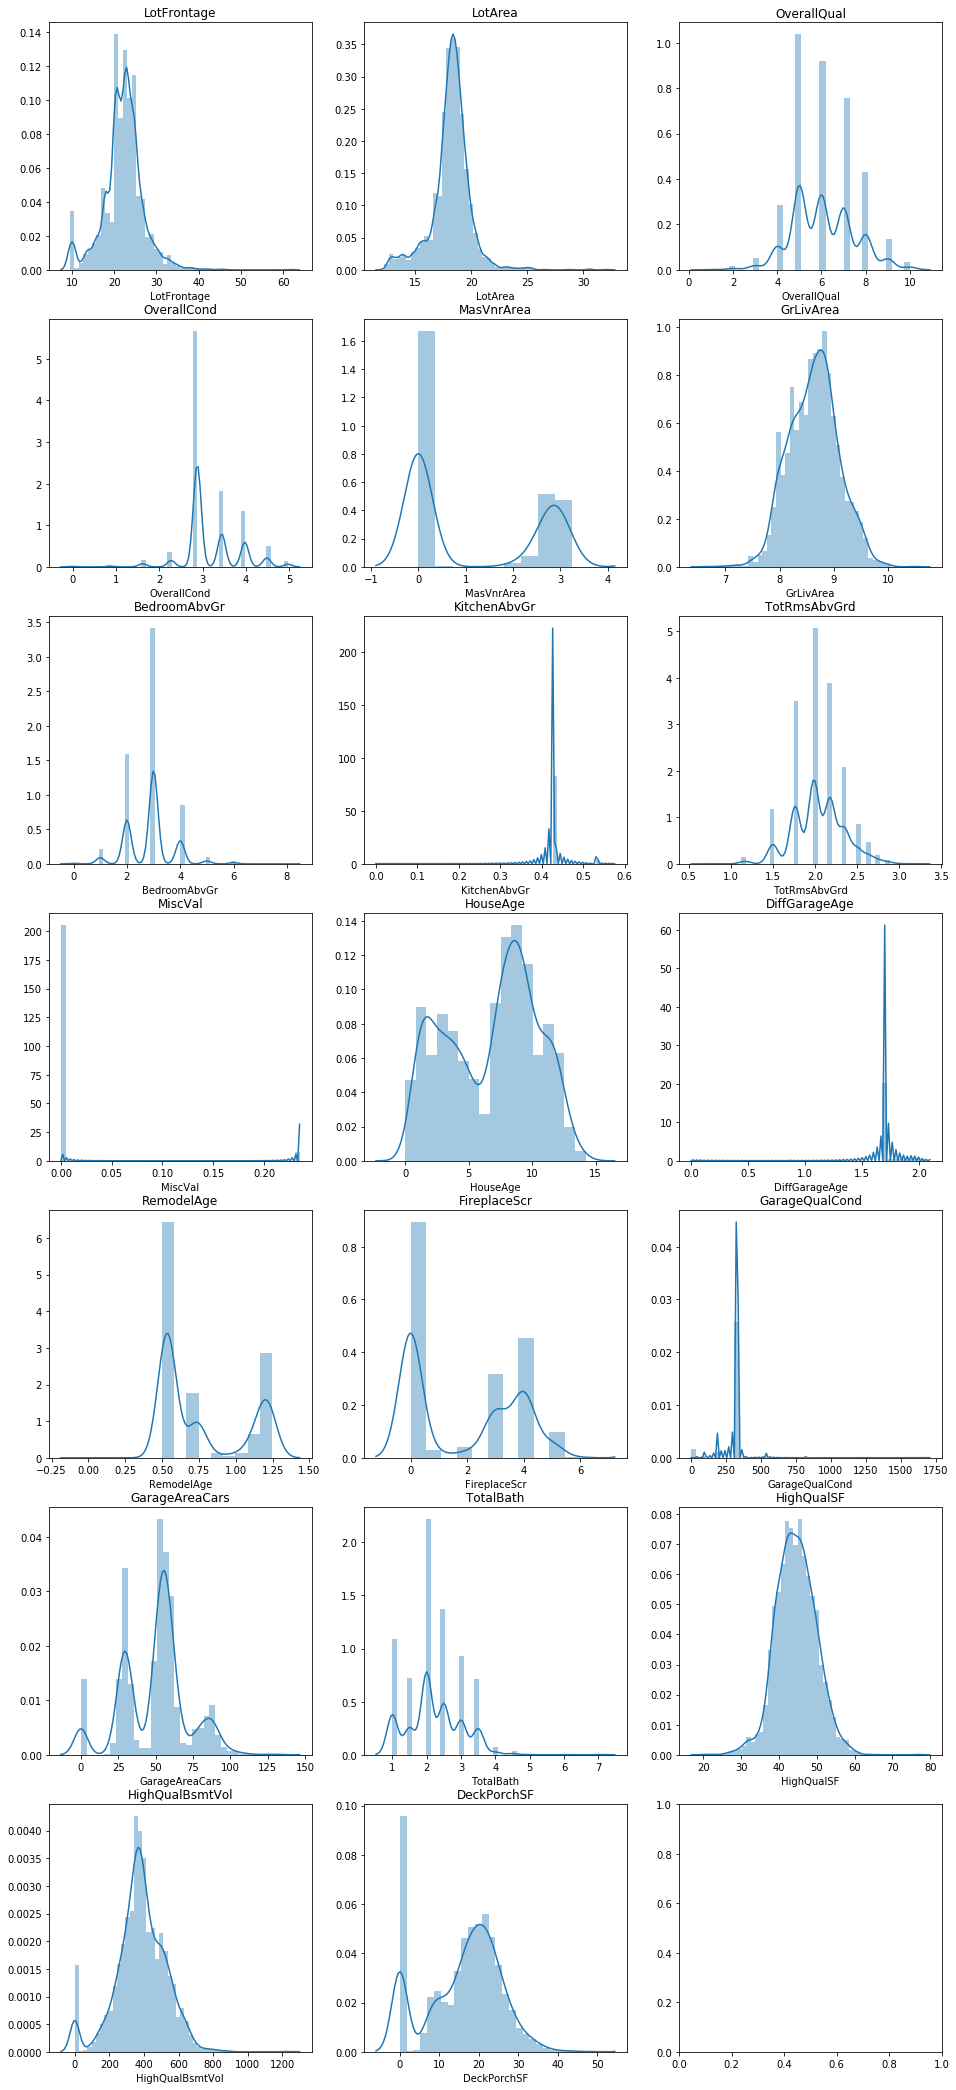

In [263]:
distplots(all_data, num_cols)

# Step 3c: Dummification

In [264]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [265]:
all_data.head()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
0    21.400329  17.943507      0         3            3          2   
1    24.693813  18.389874      0         3            3          2   
2    22.078933  18.955747      0         2            3          2   
3    20.244100  18.371452      0         2            3          2   
4    25.533920  19.824995      0         2            3          2   

   OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
0            7     2.877624    2.853695          4          3         3   
1            6     4.482384    0.000000          3          3         3   
2            7     2.877624    2.805332          4          3         3   
3            7     2.877624    0.000000          3          3         4   
4            8     2.877624    2.987100          4          3         3   

   BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  BedroomAbvGr  \
0             1          5           1           4   8.887640             3   
1             4          5           1           4   8.461874             3   
2             2          5           1           4   8.949075             3   
3             1          4           1           4   8.893406             3   
4             3          5           1           4   9.244036             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  GarageFinish  \
0      0.427668            4      2.348948           7             2   
1      0.427668            3      1.989579           7             2   
2      0.427668            4      1.989579           7             2   
3      0.427668            4      2.180664           7             1   
4      0.427668            4      2.499544           7             2   

   PavedDrive  Fence  MiscVal   HouseAge  DiffGarageAge  RemodelAge  \
0           2      0      0.0   2.861986       1.696572    0.534691   
1           2      0      0.0   7.211934       1.696572    0.534691   
2           2      0      0.0   3.407487       1.696572    0.736344   
3           2      0      0.0  11.889992       2.008380    1.221431   
4           2      0      0.0   3.651878       1.696572    0.534691   

   FireplaceScr  GarageQualCond  GarageAreaCars  Pool  TotalBath  HighQualSF  \
0             0      329.079344       57.904500     0        3.5   45.234100   
1             3      329.079344       53.074658     0        2.5   44.946339   
2             3      329.079344       60.969351     0        3.5   46.172230   
3             4      329.079344       76.532096     0        2.0   44.592794   
4             3      329.079344       87.149597     0        3.5   50.090696   

   HighQualBsmtVol  DeckPorchSF  MSSubClass_120  MSSubClass_150  \
0       378.730371    11.150056               0               0   
1       482.048227    23.887201               0               0   
2       396.091870     9.215894               0               0   
3       327.144049    24.217786               0               0   
4       453.776433    23.054084               0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSu

In [266]:
all_data.shape

(2915, 199)

**Split back into train and test sets:**

In [267]:
train = all_data.iloc[:1456]

In [268]:
train.shape

(1456, 199)

In [269]:
log_sale_price.shape

(1456,)

In [270]:
train.tail()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
1451    20.710538  17.718584      0         3            3          2   
1452    25.741715  19.531696      0         3            3          2   
1453    21.627739  18.179413      0         3            3          2   
1454    22.078933  18.432660      0         3            3          2   
1455    23.622440  18.511923      0         3            3          2   

      OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
1451            6     2.877624    0.000000          3          3         3   
1452            6     3.441520    2.721866          3          3         3   
1453            7     4.969284    0.000000          5          4         4   
1454            5     3.441520    0.000000          3          3         3   
1455            5     3.441520    0.000000          4          3         3   

      BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  \
1451             1          5           1           4   8.834706   
1452             1          3           1           4   9.160546   
1453             1          5           1           4   9.333554   
1454             2          4           1           3   8.243361   
1455             1          4           1           4   8.455243   

      BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
1451             3      0.427668            3      2.180664           7   
1452             3      0.427668            3      2.180664           6   
1453             4      0.427668            4      2.499544           7   
1454             2      0.427668            4      1.767900           7   
1455             3      0.427668            3      1.989579           7   

      GarageFinish  PavedDrive  Fence   MiscVal   HouseAge  DiffGarageAge  \
1451             2           2      0  0.000000   3.651878       1.696572   
1452             1           2      3  0.000000   7.322912       1.696572   
1453             2           2      4  0.235089  10.491739       1.696572   
1454             1           2      0  0.000000   9.841048       1.696572   
1455             3           2      0  0.000000   8.427647       1.696572   

      RemodelAge  FireplaceScr  GarageQualCond  GarageAreaCars  Pool  \
1451    0.736344             3      329.079344       53.074658     0   
1452    1.093361             4      329.079344       55.324646     0   
1453    1.227800             5      329.079344       27.582762     0   
1454    1.213713             0      329.079344       26.898821     0   
1455    0.534691             0      329.079344       28.901767     0   

      TotalBath  HighQualSF  HighQualBsmtVol  DeckPorchSF  MSSubClass_120  \
1451        2.5   45.464865       404.863673     8.985409               0   
1452        3.0   51.618915       509.337617    25.691077               0   
1453        2.0   50.937233       425.082156    11.057623               0   
1454        2.0   42.283968        58.900024    29.662739               0   
1455        2.5   44.863563       381.013501    37.506143               0   

      MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1451               0               0               0               0   
1452               0               0               0               0   
1453               0               0               0               0   
1454               0               0               0               0   
1455               0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1451              0              0              0              0   
1452              1              0              0              0   
1453              0              0              0              0   
1454              1              0              0              0   
1455              1              0              0              0   

      MSSubClass_50  MSSubClass_60  M

In [271]:
test = all_data.iloc[1456:]

In [272]:
test.shape

(1459, 199)

In [273]:
test.head()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
1456    24.693813  19.073348      0         3            3          2   
1457    24.905208  19.826824      0         2            3          2   
1458    23.405166  19.711139      0         2            3          2   
1459    24.268193  18.526527      0         2            3          2   
1460    16.025242  16.191253      0         2            1          2   

      OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
1456            5     3.441520    0.000000          3          3         3   
1457            6     3.441520    2.694245          3          3         3   
1458            5     2.877624    0.000000          3          3         3   
1459            6     3.441520    2.094525          3          3         3   
1460            8     2.877624    0.000000          4          3         3   

      BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  \
1456             1          3           1           4   7.988973   
1457             1          3           1           4   8.533950   
1458             1          4           1           4   8.819228   
1459             1          5           1           4   8.797456   
1460             1          5           1           4   8.481590   

      BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
1456             2      0.427668            3      1.767900           7   
1457             3      0.427668            4      1.989579           7   
1458             3      0.427668            3      1.989579           7   
1459             3      0.427668            4      2.180664           7   
1460             2      0.427668            4      1.767900           7   

      GarageFinish  PavedDrive  Fence   MiscVal  HouseAge  DiffGarageAge  \
1456             1           2      3  0.000000  8.959600       1.696572   
1457             1           2      0  0.235089  9.210932       1.696572   
1458             3           2      3  0.000000  4.687562       1.696572   
1459             3           2      0  0.000000  4.500065       1.696572   
1460             2           2      0  0.000000  5.523671       1.696572   

      RemodelAge  FireplaceScr  GarageQualCond  GarageAreaCars  Pool  \
1456    0.534691             0      329.079344       47.284484     0   
1457    0.534691             0      329.079344       30.773373     0   
1458    0.736344             3      329.079344       54.324183     0   
1459    0.534691             4      329.079344       53.646386     0   
1460    0.534691             0      329.079344       55.653964     0   

      TotalBath  HighQualSF  HighQualBsmtVol  DeckPorchSF  MSSubClass_120  \
1456        1.0   39.228587       172.211339    22.423851               0   
1457        1.5   45.854136       464.557646    28.237044               0   
1458        2.5   45.172690       398.229223    21.853810               0   
1459        2.5   44.987633       371.126581    27.223147               0   
1460        2.0   45.193176       486.307413    21.006058               1   

      MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1456               0               0               0               0   
1457               0               0               0               0   
1458               0               0               0               0   
1459               0               0               0               0   
1460               0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1456              1              0              0              0   
1457              1              0              0              0   
1458              0              0              0              0   
1459              0              0              0              0   
1460              0              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubCl

In [274]:
pd.set_option('display.max_rows',250)
pd.set_option('display.max_columns',250)
train.head()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
0    21.400329  17.943507      0         3            3          2   
1    24.693813  18.389874      0         3            3          2   
2    22.078933  18.955747      0         2            3          2   
3    20.244100  18.371452      0         2            3          2   
4    25.533920  19.824995      0         2            3          2   

   OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
0            7     2.877624    2.853695          4          3         3   
1            6     4.482384    0.000000          3          3         3   
2            7     2.877624    2.805332          4          3         3   
3            7     2.877624    0.000000          3          3         4   
4            8     2.877624    2.987100          4          3         3   

   BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  BedroomAbvGr  \
0             1          5           1           4   8.887640             3   
1             4          5           1           4   8.461874             3   
2             2          5           1           4   8.949075             3   
3             1          4           1           4   8.893406             3   
4             3          5           1           4   9.244036             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  GarageFinish  \
0      0.427668            4      2.348948           7             2   
1      0.427668            3      1.989579           7             2   
2      0.427668            4      1.989579           7             2   
3      0.427668            4      2.180664           7             1   
4      0.427668            4      2.499544           7             2   

   PavedDrive  Fence  MiscVal   HouseAge  DiffGarageAge  RemodelAge  \
0           2      0      0.0   2.861986       1.696572    0.534691   
1           2      0      0.0   7.211934       1.696572    0.534691   
2           2      0      0.0   3.407487       1.696572    0.736344   
3           2      0      0.0  11.889992       2.008380    1.221431   
4           2      0      0.0   3.651878       1.696572    0.534691   

   FireplaceScr  GarageQualCond  GarageAreaCars  Pool  TotalBath  HighQualSF  \
0             0      329.079344       57.904500     0        3.5   45.234100   
1             3      329.079344       53.074658     0        2.5   44.946339   
2             3      329.079344       60.969351     0        3.5   46.172230   
3             4      329.079344       76.532096     0        2.0   44.592794   
4             3      329.079344       87.149597     0        3.5   50.090696   

   HighQualBsmtVol  DeckPorchSF  MSSubClass_120  MSSubClass_150  \
0       378.730371    11.150056               0               0   
1       482.048227    23.887201               0               0   
2       396.091870     9.215894               0               0   
3       327.144049    24.217786               0               0   
4       453.776433    23.054084               0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSu

**We can get rid of the following dummy columns, because they are already represented in the dataset:**
- **MasVnrType_None: already implied if MasVnrArea = 0**
- **GarageType_None: already implied if GarageArea and GarageCars = 0**

In [275]:
train = train.drop(columns=['MasVnrType_None','GarageType_None'])
test = test.drop(columns=['MasVnrType_None','GarageType_None'])

**We can also combine the Condition1/2 and Exterior1/2 columns into one feature per attribute. For example if a house has Condition1 = PosA and Condition2 = PosN, just have one column each for Condition_PosA and Condition_PosN, with a 1 in each of those columns.**

In [276]:
condition_cols = [col for col in train.columns if col.startswith('Condition')]
exterior_cols = [col for col in train.columns if col.startswith('Exterior')]

In [277]:
conditions = [col.split("_")[1] for col in condition_cols]
conditions = list(dict.fromkeys(conditions))
exteriors = [col.split("_")[1] for col in exterior_cols]
exteriors = list(dict.fromkeys(exteriors))

In [278]:
conditions

['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']

In [279]:
exteriors

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing',
 'Brk Cmn',
 'CmentBd',
 'Other',
 'Wd Shng']

In [280]:
for cond in conditions:
    cols = []
    cols = [col for col in train.columns if (col.endswith(cond) and col.startswith('Condition'))]
    train['Condition_'+cond] = train[cols].sum(axis=1).apply(lambda x:1 if x>1 else x)
    test['Condition_'+cond] = test[cols].sum(axis=1).apply(lambda x:1 if x>1 else x)

In [281]:
for ext in exteriors:
    cols = []
    cols = [col for col in train.columns if (col.endswith(ext) and col.startswith('Exterior'))]
    train['Exterior_'+ext] = train[cols].sum(axis=1).apply(lambda x:1 if x>1 else x)
    test['Exterior_'+ext] = test[cols].sum(axis=1).apply(lambda x:1 if x>1 else x)

In [282]:
train.head()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
0    21.400329  17.943507      0         3            3          2   
1    24.693813  18.389874      0         3            3          2   
2    22.078933  18.955747      0         2            3          2   
3    20.244100  18.371452      0         2            3          2   
4    25.533920  19.824995      0         2            3          2   

   OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
0            7     2.877624    2.853695          4          3         3   
1            6     4.482384    0.000000          3          3         3   
2            7     2.877624    2.805332          4          3         3   
3            7     2.877624    0.000000          3          3         4   
4            8     2.877624    2.987100          4          3         3   

   BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  BedroomAbvGr  \
0             1          5           1           4   8.887640             3   
1             4          5           1           4   8.461874             3   
2             2          5           1           4   8.949075             3   
3             1          4           1           4   8.893406             3   
4             3          5           1           4   9.244036             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  GarageFinish  \
0      0.427668            4      2.348948           7             2   
1      0.427668            3      1.989579           7             2   
2      0.427668            4      1.989579           7             2   
3      0.427668            4      2.180664           7             1   
4      0.427668            4      2.499544           7             2   

   PavedDrive  Fence  MiscVal   HouseAge  DiffGarageAge  RemodelAge  \
0           2      0      0.0   2.861986       1.696572    0.534691   
1           2      0      0.0   7.211934       1.696572    0.534691   
2           2      0      0.0   3.407487       1.696572    0.736344   
3           2      0      0.0  11.889992       2.008380    1.221431   
4           2      0      0.0   3.651878       1.696572    0.534691   

   FireplaceScr  GarageQualCond  GarageAreaCars  Pool  TotalBath  HighQualSF  \
0             0      329.079344       57.904500     0        3.5   45.234100   
1             3      329.079344       53.074658     0        2.5   44.946339   
2             3      329.079344       60.969351     0        3.5   46.172230   
3             4      329.079344       76.532096     0        2.0   44.592794   
4             3      329.079344       87.149597     0        3.5   50.090696   

   HighQualBsmtVol  DeckPorchSF  MSSubClass_120  MSSubClass_150  \
0       378.730371    11.150056               0               0   
1       482.048227    23.887201               0               0   
2       396.091870     9.215894               0               0   
3       327.144049    24.217786               0               0   
4       453.776433    23.054084               0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSu

**Looks good, let's drop the original condition and exterior columns:**

In [283]:
train = train.drop(columns=condition_cols)
train = train.drop(columns=exterior_cols)
test = test.drop(columns=condition_cols)
test = test.drop(columns=exterior_cols)

In [284]:
train.head()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
0    21.400329  17.943507      0         3            3          2   
1    24.693813  18.389874      0         3            3          2   
2    22.078933  18.955747      0         2            3          2   
3    20.244100  18.371452      0         2            3          2   
4    25.533920  19.824995      0         2            3          2   

   OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
0            7     2.877624    2.853695          4          3         3   
1            6     4.482384    0.000000          3          3         3   
2            7     2.877624    2.805332          4          3         3   
3            7     2.877624    0.000000          3          3         4   
4            8     2.877624    2.987100          4          3         3   

   BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  BedroomAbvGr  \
0             1          5           1           4   8.887640             3   
1             4          5           1           4   8.461874             3   
2             2          5           1           4   8.949075             3   
3             1          4           1           4   8.893406             3   
4             3          5           1           4   9.244036             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  GarageFinish  \
0      0.427668            4      2.348948           7             2   
1      0.427668            3      1.989579           7             2   
2      0.427668            4      1.989579           7             2   
3      0.427668            4      2.180664           7             1   
4      0.427668            4      2.499544           7             2   

   PavedDrive  Fence  MiscVal   HouseAge  DiffGarageAge  RemodelAge  \
0           2      0      0.0   2.861986       1.696572    0.534691   
1           2      0      0.0   7.211934       1.696572    0.534691   
2           2      0      0.0   3.407487       1.696572    0.736344   
3           2      0      0.0  11.889992       2.008380    1.221431   
4           2      0      0.0   3.651878       1.696572    0.534691   

   FireplaceScr  GarageQualCond  GarageAreaCars  Pool  TotalBath  HighQualSF  \
0             0      329.079344       57.904500     0        3.5   45.234100   
1             3      329.079344       53.074658     0        2.5   44.946339   
2             3      329.079344       60.969351     0        3.5   46.172230   
3             4      329.079344       76.532096     0        2.0   44.592794   
4             3      329.079344       87.149597     0        3.5   50.090696   

   HighQualBsmtVol  DeckPorchSF  MSSubClass_120  MSSubClass_150  \
0       378.730371    11.150056               0               0   
1       482.048227    23.887201               0               0   
2       396.091870     9.215894               0               0   
3       327.144049    24.217786               0               0   
4       453.776433    23.054084               0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSu

**One last thing - combine the WdShing and Wd Shng columns, because these are supposed to be the same:**

In [285]:
train['Exterior_WdShing'] = train[['Exterior_WdShing','Exterior_Wd Shng']].sum(axis=1).apply(lambda x:1 if x>1 else x)
test['Exterior_WdShing'] = test[['Exterior_WdShing','Exterior_Wd Shng']].sum(axis=1).apply(lambda x:1 if x>1 else x)
train = train.drop(columns=['Exterior_Wd Shng'])
test = test.drop(columns=['Exterior_Wd Shng'])

In [286]:
train.head()

LotFrontage    LotArea  Alley  LotShape  LandContour  LandSlope  \
0    21.400329  17.943507      0         3            3          2   
1    24.693813  18.389874      0         3            3          2   
2    22.078933  18.955747      0         2            3          2   
3    20.244100  18.371452      0         2            3          2   
4    25.533920  19.824995      0         2            3          2   

   OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtCond  \
0            7     2.877624    2.853695          4          3         3   
1            6     4.482384    0.000000          3          3         3   
2            7     2.877624    2.805332          4          3         3   
3            7     2.877624    0.000000          3          3         4   
4            8     2.877624    2.987100          4          3         3   

   BsmtExposure  HeatingQC  CentralAir  Electrical  GrLivArea  BedroomAbvGr  \
0             1          5           1           4   8.887640             3   
1             4          5           1           4   8.461874             3   
2             2          5           1           4   8.949075             3   
3             1          4           1           4   8.893406             3   
4             3          5           1           4   9.244036             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  GarageFinish  \
0      0.427668            4      2.348948           7             2   
1      0.427668            3      1.989579           7             2   
2      0.427668            4      1.989579           7             2   
3      0.427668            4      2.180664           7             1   
4      0.427668            4      2.499544           7             2   

   PavedDrive  Fence  MiscVal   HouseAge  DiffGarageAge  RemodelAge  \
0           2      0      0.0   2.861986       1.696572    0.534691   
1           2      0      0.0   7.211934       1.696572    0.534691   
2           2      0      0.0   3.407487       1.696572    0.736344   
3           2      0      0.0  11.889992       2.008380    1.221431   
4           2      0      0.0   3.651878       1.696572    0.534691   

   FireplaceScr  GarageQualCond  GarageAreaCars  Pool  TotalBath  HighQualSF  \
0             0      329.079344       57.904500     0        3.5   45.234100   
1             3      329.079344       53.074658     0        2.5   44.946339   
2             3      329.079344       60.969351     0        3.5   46.172230   
3             4      329.079344       76.532096     0        2.0   44.592794   
4             3      329.079344       87.149597     0        3.5   50.090696   

   HighQualBsmtVol  DeckPorchSF  MSSubClass_120  MSSubClass_150  \
0       378.730371    11.150056               0               0   
1       482.048227    23.887201               0               0   
2       396.091870     9.215894               0               0   
3       327.144049    24.217786               0               0   
4       453.776433    23.054084               0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSu

In [287]:
train.shape

(1456, 176)

# NOTE:
**I originally used an entire section for feature removal and dimensionality reduction, which removed features based on VIF and then applied PCA. However, I decided to remove it because I was not getting as accurate of a result (my submission using VIF and PCA got me to top 30%, while this submission got me to top 19%). I have these sections in a separate notebook that I will not submit, but will have available for reference in case. The lesson learned here is that doing feature removal prior to using regularized models may result in too much information lost from the original dataset.**

# Step 4: Model Training

**A popular way to approach Kaggle competitions is model stacking, where several different models are used and weighted to arrive at a final result. For practice with all of the different types of models we have learned so far, I'll find the best parameters and stack models for the following types of models that can be used for regression:**
- **Lasso Regression**
- **Ridge Regression**
- **Elastic Net Regression**
- **Support Vector Regressor**
- **Random Forests**
- **Gradient Boosting**
- **Light Gradient Boosting (bonus)**
- **XG Boost (bonus)**

**Let's start by using cross-validation on each model to determine the best parameters, observe the performance of each individual model, and stack them all at the end.**

In [288]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

**Function to calculate RMSE between the prediction and actual values:**

In [289]:
def rmse(model, X, y):
    return np.sqrt(mse(y, model.predict(X)))

**Function to get the mean CV RMSE, which will be the best indicator of how the model does on the test set (i.e., how it does on data it is not trained on):**

In [290]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return np.mean(rmse)

**Function to perform grid search CV, select and fit the best model, and print the R^2, RMSE, and CV RMSE:**

In [291]:
def model_cv_fit(model, param_grid, X, y):
    cv = GridSearchCV(estimator=model, param_grid=param_grid)
    cv.fit(X,y)
    print(cv.best_params_)
    model_best = cv.best_estimator_
    model_best.fit(X,y)
    print("R^2: " + str(model_best.score(X,y)))
    print("RMSE: " + str(rmse(model_best,X,y)))
    print("Avg CV RMSE: " + str(rmse_cv(model_best,X,y)))
    return model_best

## Lasso Regression

**For Lasso, just need to fit the parameter alpha (inverse of lambda, so smaller alpha means more penalization).**

In [292]:
alpha = [0.0003,0.0004,0.0005]
param_grid = {'lasso__alpha':alpha}
lasso = Pipeline(steps=[('scaler',RobustScaler()), ('lasso',Lasso())])
lasso_best = model_cv_fit(lasso, param_grid, train, log_sale_price)

{'lasso__alpha': 0.0004}
R^2: 0.9330332273424703
RMSE: 0.10246142474735999
Avg CV RMSE: 0.11083478045295894


## Ridge Regression

**Ridge is tuned in the same way as Lasso. The only difference between the two models is how it penalizes: Lasso uses the L1 norm (Manhattan distance), while Ridge uses the L2 norm (Euclidean distance).**

In [293]:
alpha = [7.9,8,8.1]
param_grid = {'ridge__alpha':alpha}
ridge = Pipeline(steps=[('scaler',RobustScaler()), ('ridge',Ridge())])
ridge_best = model_cv_fit(ridge, param_grid, train, log_sale_price)

{'ridge__alpha': 8}
R^2: 0.9351173689639936
RMSE: 0.10085441905465109
Avg CV RMSE: 0.11275455212400964


## Elastic Net Regression

**Elastic Net requires tuning an additional parameter, rho, for the weighting between Lasso and Ridge.**

In [294]:
alpha = [0.0004,0.0005,0.0006]
rho = [0.82,0.83,0.84]
param_grid = {'enet__alpha':alpha,'enet__l1_ratio':rho}
enet = Pipeline(steps=[('scaler',RobustScaler()), ('enet',ElasticNet())])
enet_best = model_cv_fit(enet, param_grid, train, log_sale_price)

{'enet__alpha': 0.0005, 'enet__l1_ratio': 0.83}
R^2: 0.932858487734113
RMSE: 0.10259501640967808
Avg CV RMSE: 0.11086545407327678


## Support Vector Regressor

**SVR requires more tuning, and the specific parameters will depend on the best type of kernel. Let's just assume the default rbf kernel, and fit to those parameters. The parameters that need to be tuned are gamma (controls the "shape" of the kernel), and C and epsilon (both control how "wide" the support vector margin is).**

In [295]:
C  = [29] # also tried 28, 30
epsilon = [0.054] # also tried 0.053, 0.055
gamma = [5e-5] # also tried 4e-5, 6e-5
param_grid = {'C':C, 'epsilon':epsilon, 'gamma':gamma}
svr_best = model_cv_fit(SVR(kernel='rbf'), param_grid, train, log_sale_price)

{'C': 29, 'epsilon': 0.054, 'gamma': 5e-05}
R^2: 0.9369428474952606
RMSE: 0.09942552284342557
Avg CV RMSE: 0.14551910596293585


## Random Forest

**For RF I will tune three parameters: n_estimators (number of individual trees in the random forest), max_depth (maximum depth of a single tree in the ensemble), and min_samples_leaf (minimum number of samples at each leaf node).**

In [296]:
n_estimators = [300] # Also tried 200, 400
max_depth = [10] # Also tried 9, 11
min_samples_leaf = [3] # Also tried 1, 2, 4
param_grid = {'n_estimators':n_estimators,'min_samples_leaf':min_samples_leaf,'max_depth':max_depth}
rf_best = model_cv_fit(RandomForestRegressor(), param_grid, train, log_sale_price)

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 300}
R^2: 0.9627578979451699
RMSE: 0.07640957758340063
Avg CV RMSE: 0.13648214829789435


## Gradient Boosting

**For all three gradient boosting methods, tune learning_rate (how large of a step gradient boosting takes in between iterations), n_estimators (number of individual trees in the ensemble), max_depth (maximum depth of an individual tree), and subsample (fraction of samples used in the fitting of each tree, which is essentially regularization).**

In [297]:
learning_rate = [0.05] # Also tried 0.025, 0.075
n_estimators = [300] # Also tried 250, 350
max_depth = [3] # Also tried 2, 4
min_samples_leaf = [4] # Also tried 3, 5
subsample = [0.8] # Also tried 0.7, 0.9
param_grid = {'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'subsample':subsample}
gbm_best = model_cv_fit(GradientBoostingRegressor(loss='huber', random_state=0), param_grid, train, log_sale_price)

{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 300, 'subsample': 0.8}
R^2: 0.9558029692979303
RMSE: 0.08323907632530989
Avg CV RMSE: 0.11824751307186983


## LGBM

In [298]:
learning_rate = [0.05] # Also tried 0.025, 0.075
n_estimators = [800] # Also tried, 700, 900
max_depth = [3] # Also tried 2, 4
subsample = [0.8] # Also tried 0.7, 0.9
param_grid = {'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth,'subsample':subsample}
lgbm_best = model_cv_fit(LGBMRegressor(), param_grid, train, log_sale_price)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.8}
R^2: 0.9712451899649761
RMSE: 0.06714071428778648
Avg CV RMSE: 0.12215273845098988


## XGBoost

In [299]:
learning_rate = [0.05] # Also tried 0.025, 0.075
n_estimators = [500] # Also tried 300, 500
max_depth = [3] # Also tried 2, 4
subsample = [0.8] # Also tried 0.7, 0.9
param_grid = {'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth,'subsample':subsample}
xgb_best = model_cv_fit(XGBRegressor(), param_grid, train, log_sale_price)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
R^2: 0.9746766632511781
RMSE: 0.0630073437293173
Avg CV RMSE: 0.11648600610285545


## Stack Models using StackingRegressor

**I did not use SVR or RF in the stacking, since those two were had the weakest performance.**

In [300]:
from sklearn.ensemble import StackingRegressor
stack = StackingRegressor(estimators=[('lasso',lasso_best), ('ridge',ridge_best), ('enet',enet_best), ('gbm',gbm_best), ('lgbm',lgbm_best), ('xgb',xgb_best)], cv=10)
stack.fit(train, log_sale_price)
print("R^2: " + str(stack.score(train, log_sale_price)))

R^2: 0.9512914877920303


In [301]:
rmse_cv(stack, train, log_sale_price)

0.10957164772515751

## Create Submission

**This admittedly took a lot of trial and error with submissions to Kaggle, after many attempts I figured out that LGBM and Ridge were the most successful standalone models, so I gave them higher weights in the final blending. This submission achieved top 19% (about 1000th out of 5200 submissions).**

In [304]:
submission_weights = pd.DataFrame()
submission_weights['ID'] = test.index.values+5
w_stack = 0.35
w_xgb = 0.05
w_lgbm = 0.25
w_gbm = 0.05
w_rf = 0
w_svr = 0
w_enet = 0.05
w_ridge = 0.2
w_lasso = 0.05
print(w_stack+w_xgb+w_lgbm+w_gbm+w_rf+w_svr+w_enet+w_ridge+w_lasso)
submission_weights['SalePrice'] = np.exp(w_stack*stack.predict(test) + w_xgb*xgb_best.predict(test) + w_lgbm*lgbm_best.predict(test) + w_gbm*gbm_best.predict(test) + w_rf*rf_best.predict(test) + w_svr*svr_best.predict(test) + w_enet*enet_best.predict(test) + w_ridge*ridge_best.predict(test) + w_lasso*lasso_best.predict(test))

1.0


In [305]:
submission_weights.to_csv('submit.csv', index=False)

# Step 5: Model Explainability

**The model predicts reasonably well, but we still don't know what exactly drives housing prices. To look more into this, let's look at the regression coefficients of the linear models and the feature importance of the gradient boosting models. Since Ridge and LGBM ended up performing the best on the test set, I'll use those to visualize importance.**

In [306]:
ridge_coefs = pd.DataFrame()
ridge_coefs['feature'] = train.columns
ridge_coefs['coef'] = ridge_best['ridge'].coef_
ridge_coefs.sort_values(by='coef',ascending=False)

feature      coef
16               GrLivArea  0.114706
69    Neighborhood_Crawfor  0.091234
6              OverallQual  0.090886
34              HighQualSF  0.088498
85    Neighborhood_StoneBr  0.083183
161       Exterior_BrkFace  0.058533
14              CentralAir  0.057815
54             MSZoning_FV  0.057185
78    Neighborhood_NoRidge  0.049361
79    Neighborhood_NridgHt  0.048930
55             MSZoning_RH  0.047266
7              OverallCond  0.046412
66    Neighborhood_BrkSide  0.041542
56             MSZoning_RL  0.038998
169        Exterior_Stucco  0.036529
31          GarageAreaCars  0.036339
144  SaleCondition_AdjLand  0.033929
76    Neighborhood_NPkVill  0.033639
59       LotConfig_CulDSac  0.033520
1                  LotArea  0.033116
21              Functional  0.032003
33               TotalBath  0.029038
29            FireplaceScr  0.028835
140           SaleType_New  0.028631
147   SaleCondition_Normal  0.028518
137         SaleType_ConLD  0.026511
19             KitchenQual  0.025602
32                    Pool  0.025406
166       Exterior_MetalSd  0.023792
113        Foundation_Slab  0.023711
88           BldgType_1Fam  0.023204
48           MSSubClass_70  0.022970
13               HeatingQC  0.021437
141           SaleType_Oth  0.019821
109       MasVnrType_Stone  0.019557
37          MSSubClass_120  0.019541
42           MSSubClass_20  0.019330
47           MSSubClass_60  0.018307
67    Neighborhood_ClearCr  0.017766
36             DeckPorchSF  0.017341
129               MoSold_5  0.017227
12            BsmtExposure  0.017165
87    Neighborhood_Veenker  0.017052
23              PavedDrive  0.015814
135           SaleType_CWD  0.015805
163       Exterior_CemntBd  0.015188
35         HighQualBsmtVol  0.014216
99       HouseStyle_SFoyer  0.013917
57             MSZoning_RM  0.012519
112       Foundation_PConc  0.011843
65     Neighborhood_BrDale  0.011836
114       Foundation_Stone  0.011789
104          RoofStyle_Hip  0.011638
9                ExterQual  0.010440
96       HouseStyle_2.5Fin  0.010032
106         RoofStyle_Shed  0.009958
8               MasVnrArea  0.009459
174       Exterior_CmentBd  0.009393
105      RoofStyle_Mansard  0.008700
2                    Alley  0.008656
136           SaleType_Con  0.008346
58        LotConfig_Corner  0.007778
5                LandSlope  0.007569
100        HouseStyle_SLvl  0.007512
92         BldgType_TwnhsE  0.007335
130               MoSold_6  0.006770
128               MoSold_4  0.006496
94       HouseStyle_1.5Unf  0.006166
145   SaleCondition_Alloca  0.005757
159       Exterior_AsphShn  0.005734
157         Condition_RRNn  0.005342
64    Neighborhood_Blueste  0.005300
151         Condition_Norm  0.005272
97       HouseStyle_2.5Unf  0.004999
0              LotFrontage  0.004983
101         RoofStyle_Flat  0.004731
131               MoSold_7  0.004412
170       Exterior_VinylSd  0.004256
122               MoSold_1  0.004065
22            GarageFinish  0.003920
20            TotRmsAbvGrd  0.002818
84    Neighborhood_Somerst  0.002409
62        LotConfig_Inside  0.002392
46           MSSubClass_50  0.002328
49           MSSubClass_75  0.002231
81      Neighborhood_SWISU  0.000948
165       Exterior_ImStucc  0.000723
30          GarageQualCond  0.000111
24                   Fence  0.000092
38          MSSubClass_150  0.000000
167       Exterior_Plywood -0.000026
40          MSSubClass_180 -0.000339
164       Exterior_HdBoard -0.000562
3                 LotShape -0.000780
89         BldgType_2fmCon -0.000825
121      GarageType_Detchd -0.001394
111      Foundation_CBlock -0.001410
175         Exterior_Other -0.001616
50           MSSubClass_80 -0.002479
148  SaleCondition_Partial -0.002493
171       Exterior_Wd Sdng -0.002631
102        RoofStyle_Gable -0.002791
125              MoSold_12 -0.002946
168         Exterior_Stone -0.003229
133               MoSold_9 -0.003514
4              LandContour -0.003740
127               MoSold_3 -0.003785
45           MSSubClass

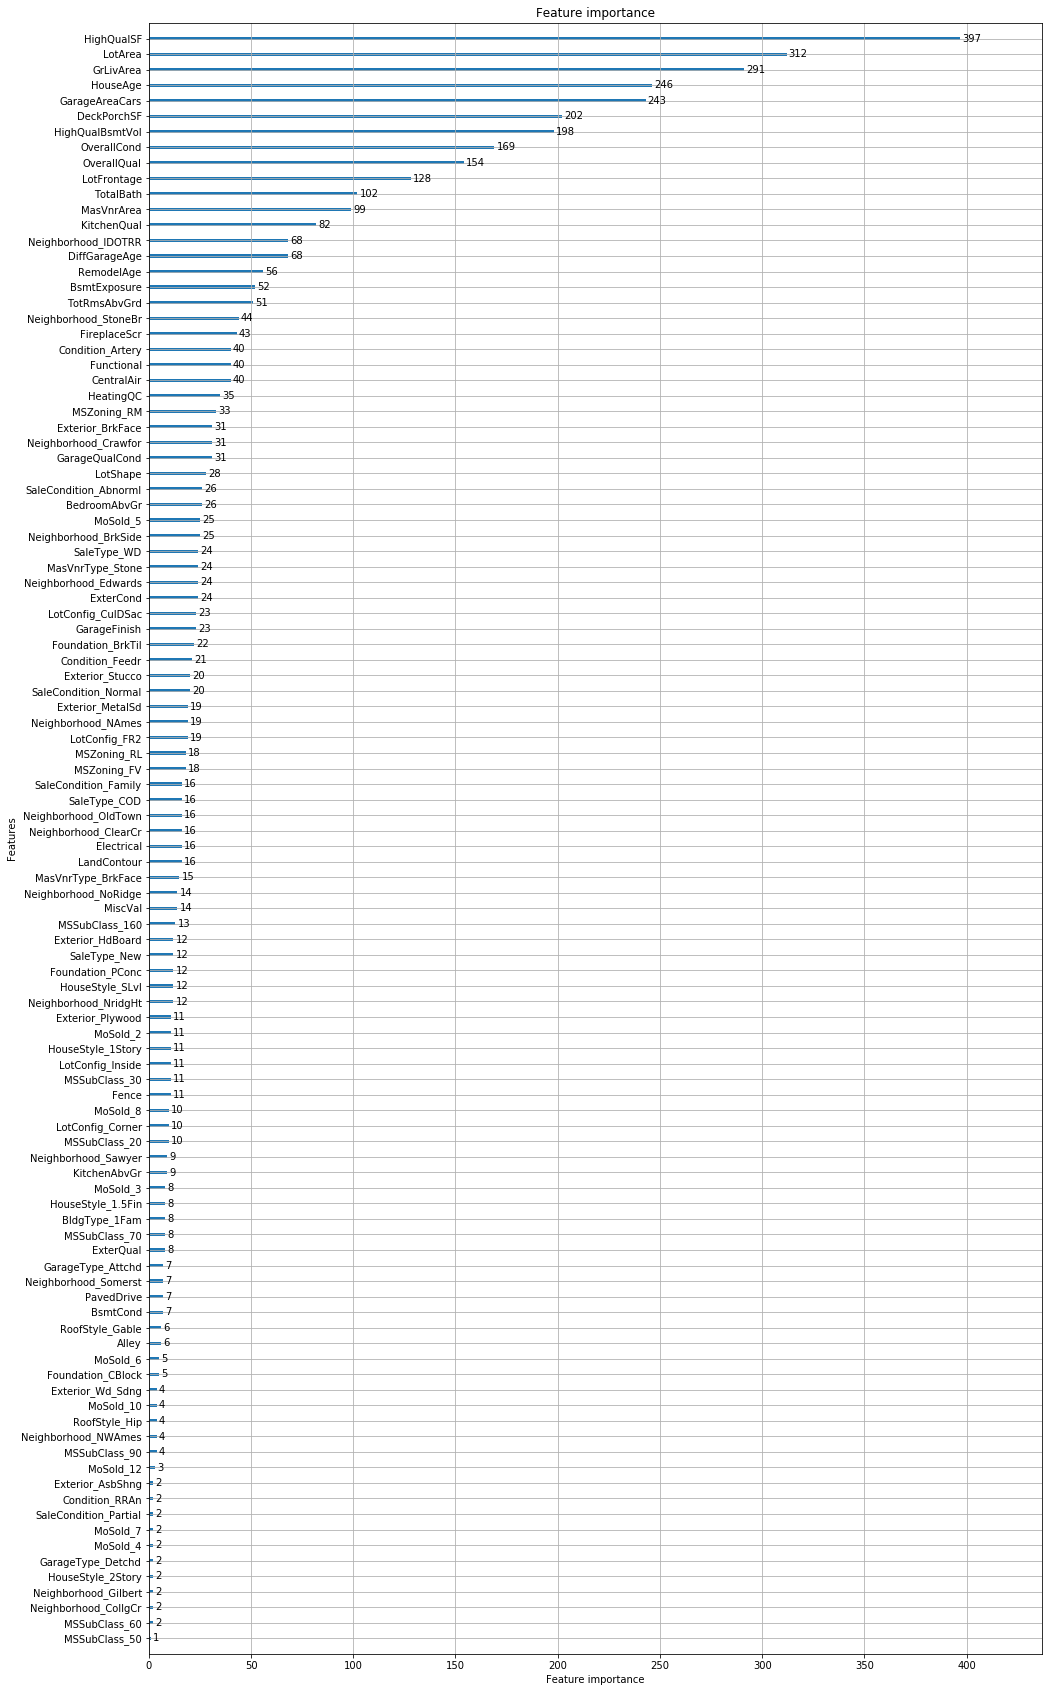

In [307]:
from lightgbm import plot_importance
fig, ax = plt.subplots(1,1,figsize=(16,30))
plot_importance(lgbm_best, ax=ax)

**Some observations here:**
+ **The regression coefficients are more useful in determining which features positively or negatively influence sale price. The LGBM feature importance does not indicate a positive/negative direction, only how important (i.e., how far on average the variable appears near the top of the individual decision trees).**
+ **Typical measures for house size like GrLivArea, HighQualSF, and Lot Area are important in influencing sale price, where the sale price increases with these measures. Other size metrics that are influential but less important include GarageAreaCars, HighQualBsmtVol, and DeckPorchSF. It makes sense that the bigger the house, the more expensive it will be.**
+ **HouseAge is also an important feature, appearing 4th on the list for LGBM and as the second highest negative feature for Ridge (the lower the age (newer), the more expensive the house).**
+ **As expected, OverallQual and OverallCond show up high in importance and positively influence sale price.**
+ **The ridge regression coefficients are useful in determining the average property value in different neighborhoods. Crawford and Stone Brook have the highest property values, and IDOTRR has the lowest (likely because it is next to a railroad). IDOTRR also shows up high in the LGBM importance list, indicating that presence in this neighborhood is a good indicator for predicting house prices.**
+ **The ridge regression coefficients can also be used to determine which conditions influence house prices the most. The presence of an arterial street or railroad have a strong negative impact on sale price, and the presence of a house in a commercial area does as well.**

# Step 6: Future Work

**With more time, I would try to do the following:**
+ **Try simpler solutions with less feature engineering. I looked at several submissions that achieved top 10%, and their solutions were actually a lot simpler than mine. In this case, it could be that the simpler the better.**
+ **Try to use random search or Bayesian optimization for hyperparameter tuning. This step actually ended up being the most time consuming, especially tuning the tree-based models (RF, GBM, LGBM, XGB).**
+ **Try using Keras to model a neural network. Some Kaggle submissions use neural networks and they actually don't perform as well as shallow learning methods for this problem (which is probably why it is called "advanced regression techniques"), but it would still be a good exercise to practice deep learning methods.**
+ **Do a high-level comparison of model results to what is available on Neighborhood Scout. It would be particularly interesting to see how the regression coefficients/feature importances for specific neighborhoods compare to the data on Neighborhood Scout.**

**With more data, I would try to do the following:**
+ **Use the lessons learned from this exercise to look into housing prices for other cities. I would expect that a model for NYC or LA would depend on different variables than houses for Ames.**
+ **Try to pull in more data for the current model based on predictors that are missing but known to be important in predicting house prices, such as school quality.**